# Advanced analytics data challenge 
# Step 1: Make raw data ready for analysis
## Airbnb: 
#### by Emine Büsra Cevik

# Prerequisites 

In [208]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from scipy.stats import ttest_ind
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from matplotlib import font_manager





## 1. Introduction to data set

- Data set  
    - Assumption: Data is collected X weeks before the booking date. It is the same for all cities

    - Quality check: 
        - Duplication 

- realSum: 
    - definition: the total price of the booking in EUR
    - assumption: the price includes extra fees 
    - assumption: the price is independent of the number of guests


- room_type: 
    - definition: the type of the room 
    - data type: categorical (string), Entire home/apt, private room, shared room

    - quality check: 
        - null or other

- room_shared: 
    - definition: whether the room is shared or not 
    - data type: boolean
    
    - quality check:
        - the relationship with room_type (Entire home/apt)
        - null or other 


- room_private: 
    - definition: whether the room is private or not 
    - data type: boolean

    - quality check: 
        - the relationship with room_type (esp Entire home/apt) and room_shared
        - null or other 


- person_capacity: 
    - definition: maximum number of guests that can stay at the property
    - data type: numeric 

    - quality check: 
        - distribution


- host_is_superhost:
    - definition: wheter the host has superhost badge (https://www.airbnb.com/help/article/828)
        - Criteria for being superhost
            - Hosted at least 10 reservations, or 3 reservations that total at least 100 nights
            - Maintained a 90% or higher response rate
            - Maintained a less than 1% cancellation rate, with exceptions for cancellations due to Major Disruptive Events or other valid reasons
            - Maintained a 4.8 or higher overall rating (A review counts towards Superhost status when either both the guest and the host have submitted a review, or the 14-day window for reviews is over, whichever comes first.)
        - Benefit of being superhost: 
            - Unique badge on their listing 
    - data type: boolean

    - quality check: 
        - null or other 

- multi:
    - definition: whether the host has more than one listing 
    - data type: boolean

    - quality check:
        - null or other 


- biz:
    - definition: whether a particular listing offers business facilities like meeting area/conference rooms in addition to accommodation options
    - data type: boolean

    - quality check:
        - null or other 


- cleanliness_rating:
    - definition: cleanliness rating by guests, scales between 1-10
    - data type: numeric

    - quality check:
        - distribution


- guest_satisfaction_overall:
    - definition: average satisfaction rating by guests, scales between 1-100
        - guests give ratings in 6 areas: accuracy, check-in, cleanliness, communication, location, value
    - data type: numeric

    - quality check:
        - distribution


- bedrooms: 
    - definition: number of bedrooms 
    - assumption: if the number of bedroom is zero and room type is entire home, then it is a studio apartment 
    - open point: if the number of bedroom is zero and room type is private room, what is it?
    - data type: numeric

    - quality check:
        - distribution


- dist:
    - definition: how far the listing is from the city center
    - data type: numeric

    - quality check:
        - distribution


- metro_dist:
    - definition: how far the listing is from the nearest metro stop
    - assumption: metro is the main transportation way 
    - data type: numeric

    - quality check:
        - distribution


- attr_index:
    - definition: scales between 0-100
    - data type: numeric

    - quality check:
        - distribution


- attr_index_norm:
    - definition: normalized attr_index
    - data type: numeric

    - quality check:
        - distribution


- rest_index:
    - definition: scales between 0-100
    - data type: numeric

    - quality check:
        - distribution


- rest_index_norm: normalized rest_index
    - definition: 
    - data type: 


- lng:
    - definition: longitude of the listing location
    - data type: numeric

    - quality check:
        - visual check on the map 


- lat:
    - definition: latitude of the listing location
    - data type: numeric

    - quality check:
        - visual check on the map, combined with lng


- weekday:
    - definition: whether the stay happens on weekdays (except Friday & Saturday night) or weekend (Friday & Saturday night)
    - data type: boolean

    - quality check 
        - null or other 


- city:
    - definition: the city where the listing is
    - data type: categorical 

    - quality check
        - distribution by city 



# 2. Preparing data set

In [95]:
# Read data from csv 
raw_df = pd.read_csv("airbnb_dataset.csv")

# In order to keep raw data safe, create a main_df that is a copy of the raw_df
main_df = raw_df

## 2.1. Overview of the data set

In [96]:
# overview of the data set
main_df.head()

realSum        room_type  room_shared  room_private  person_capacity  \
0  121.122322     Private room        False          True              2.0   
1  195.912416     Private room        False          True              2.0   
2  193.325337     Private room        False          True              3.0   
3  180.389943     Private room        False          True              2.0   
4  405.700981  Entire home/apt        False         False              3.0   

   host_is_superhost  multi  biz  cleanliness_rating  \
0              False      0    0                 6.0   
1              False      1    0                10.0   
2              False      1    0                10.0   
3              False      1    0                 9.0   
4              False      0    1                 7.0   

   guest_satisfaction_overall  ...      dist  metro_dist  attr_index  \
0                        69.0  ...  5.734117    0.437094  222.882243   
1                        96.0  ...  4.788905    1.464050  235.385841   
2                        95.0  ...  4.596677    0.450306  268.913812   
3                        87.0  ...  2.054769    0.132670  472.381314   
4                        65.0  ...  4.491277    0.354108  318.491470   

   attr_index_norm   rest_index  rest_index_norm      lng       lat  weekday  \
0        15.493414   470.088502         8.413765 -0.04975  51.52570        0   
1        16.362588   530.133525         9.488466 -0.08475  51.54210        0   
2        18.693247   548.987610         9.825922 -0.14585  51.54802        0   
3        32.837067  1021.271062        18.278973 -0.10611  51.52108        0   
4        22.139584   692.775411        12.399473 -0.18797  51.49399        0   

     city  
0  london  
1  london  
2  london  
3  london  
4  london  

[5 rows x 21 columns]

In [97]:
#column names 
main_df.columns

Index(['realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat', 'weekday', 'city'],
      dtype='object')

## 2.2. Duplication check

In [98]:
print("Is there any duplicated rows?\n", main_df.duplicated().any())

Is there any duplicated rows?
 False


## 2.3. Characteristics of the data set

In [99]:
print("Number of rows within the data set: ", main_df.shape[0])
print("Number of columns within the data set: ", main_df.shape[1])

Number of rows within the data set:  51707
Number of columns within the data set:  21


In [100]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     51707 non-null  float64
 1   room_type                   51707 non-null  object 
 2   room_shared                 51707 non-null  bool   
 3   room_private                51707 non-null  bool   
 4   person_capacity             51707 non-null  float64
 5   host_is_superhost           51707 non-null  bool   
 6   multi                       51707 non-null  int64  
 7   biz                         51707 non-null  int64  
 8   cleanliness_rating          51707 non-null  float64
 9   guest_satisfaction_overall  51707 non-null  float64
 10  bedrooms                    51707 non-null  int64  
 11  dist                        51707 non-null  float64
 12  metro_dist                  51707 non-null  float64
 13  attr_index                  517

There is no null observation

## 2.4 Data preprocessing

### - realSum: the total price of the booking in EUR
- It is a numerical data with decimals, the data type float64 is a correct way to represent 
- Check if there is any outlier

In [101]:
main_df["realSum"].describe()


count    51707.000000
mean       279.879591
std        327.948386
min         34.779339
25%        148.752174
50%        211.343089
75%        319.694287
max      18545.450285
Name: realSum, dtype: float64

- Maximum value is much bigger than mean and 75th percentile. 
- **Suspicion**: Right skewed data and outliers

<Axes: >

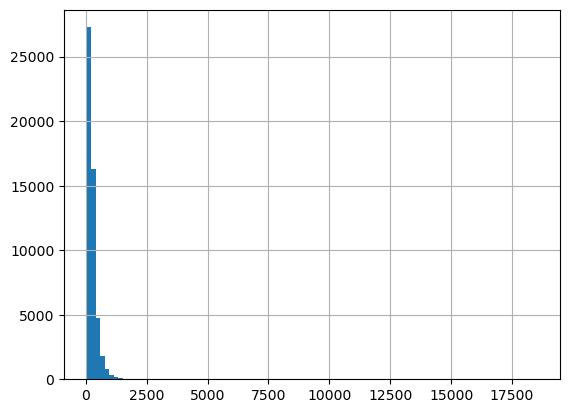

In [102]:
main_df["realSum"].hist(bins = 100)


### **<span style="color:red;">NOTE</span>**
Check log transformation


In [103]:
# Log-transform the "realSum" column and create a new column
main_df['log_realSum'] = main_df['realSum'].apply(lambda x: np.log(x) if x > 0 else None)

In [104]:
main_df["log_realSum"].describe()

count    51707.000000
mean         5.419519
std          0.596600
min          3.549024
25%          5.002282
50%          5.353483
75%          5.767365
max          9.827980
Name: log_realSum, dtype: float64

<Axes: >

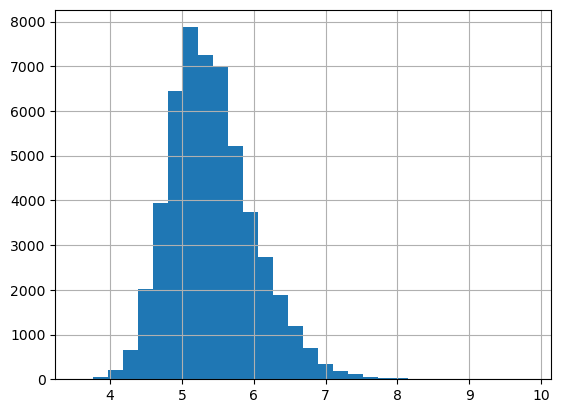

In [105]:
main_df["log_realSum"].hist(bins = 30)

### - room_type: the type of the room 
It should by categorical variable with 3 potential input (Entire home/apt, private room, shared room)

In [106]:
main_df["room_type"] = main_df["room_type"].astype("category")

### - room_shared: whether the room is shared or not 
It should be boolean

In [107]:
main_df["room_shared"].dtype

dtype('bool')

In [108]:
# Check the relationship between room_shared and room_type
pd.crosstab(main_df["room_type"], main_df["room_shared"])

room_shared      False  True 
room_type                    
Entire home/apt  32648      0
Private room     18693      0
Shared room          0    366

### - room_private: whether the room is private or not 
It should be boolean

In [109]:
main_df["room_shared"].dtype

dtype('bool')

In [110]:
# Check the relationship between room_type and room_shared
pd.crosstab(main_df["room_type"], main_df["room_private"])

room_private     False  True 
room_type                    
Entire home/apt  32648      0
Private room         0  18693
Shared room        366      0

**NOTE** 
- room_private returns true when room_type is private room and room_shared returns true when room_type is shared room. 
- If the room_type is entire home/apt, then both returns false

### - person_capacity: maximum number of guests that can stay at the property
Data type should be numeric, specifically, integer 

In [111]:
main_df["person_capacity"].dtype

dtype('float64')

In [112]:
main_df["person_capacity"] = main_df["person_capacity"].astype("int64")

In [113]:
main_df["person_capacity"].describe()

count    51707.000000
mean         3.161661
std          1.298545
min          2.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: person_capacity, dtype: float64

In [114]:
main_df["person_capacity"].value_counts().sort_index()

2    24333
3     6165
4    14000
5     2935
6     4274
Name: person_capacity, dtype: int64

### - host_is_superhost: whether the host has superhost badge (https://www.airbnb.com/help/article/828)
It should be boolean

In [115]:
main_df["host_is_superhost"].dtype

dtype('bool')

<Axes: >

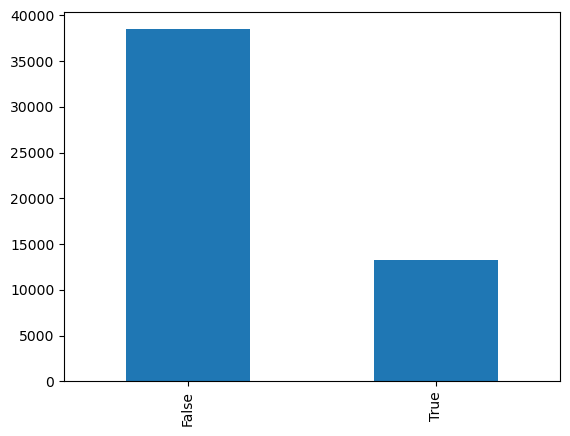

In [116]:
# Plot the histogram
main_df['host_is_superhost'].value_counts().plot(kind='bar')

### - multi: whether the host has more than one listing 
It should be boolean

In [117]:
main_df["multi"].dtype

dtype('int64')

In [118]:
main_df["multi"] = main_df["multi"].astype("bool")

<Axes: >

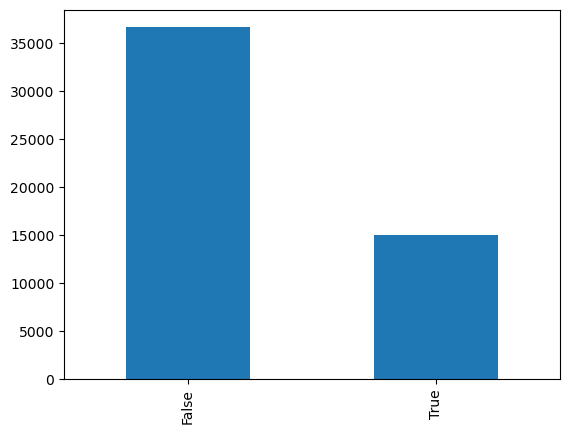

In [119]:
# Plot the histogram
main_df['multi'].value_counts().plot(kind='bar')

### - mbiz: whether a particular listing offers business facilities like meeting area/conference rooms in addition to accommodation options
It should be boolean

In [120]:
main_df["biz"].dtype

dtype('int64')

In [121]:
main_df["biz"] = main_df["biz"].astype("bool")

<Axes: >

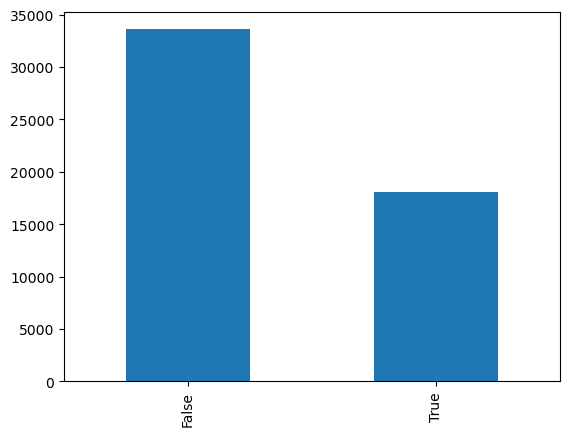

In [122]:
# Plot the histogram
main_df['biz'].value_counts().plot(kind='bar')

### - cleanliness_rating: cleanliness rating by guests, scales between 1-10
It should be integer

In [123]:
main_df["cleanliness_rating"].dtype

dtype('float64')

In [124]:
main_df["cleanliness_rating"] = main_df["cleanliness_rating"].astype("int64")

In [125]:
main_df["cleanliness_rating"].value_counts().sort_index()

2       143
3        10
4       143
5        86
6       501
7       947
8      4352
9     15458
10    30067
Name: cleanliness_rating, dtype: int64

### - guest_satisfaction_overall: average satisfaction rating by guests, scales between 1-100
It should be float

In [126]:
main_df["guest_satisfaction_overall"].dtype

dtype('float64')

In [127]:
main_df["guest_satisfaction_overall"].describe()

count    51707.000000
mean        92.628232
std          8.945531
min         20.000000
25%         90.000000
50%         95.000000
75%         99.000000
max        100.000000
Name: guest_satisfaction_overall, dtype: float64

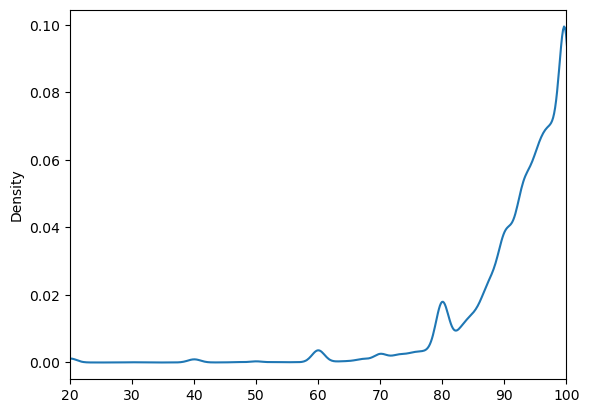

In [128]:
# Plot the KDE
main_df["guest_satisfaction_overall"].plot.kde()

# Set x-axis limits to the range of the data
plt.xlim(main_df["guest_satisfaction_overall"].min(), main_df["guest_satisfaction_overall"].max())

# Display the plot
plt.show()


### - bedrooms: number of bedrooms 

In [129]:
main_df["bedrooms"].dtype

dtype('int64')

In [130]:
main_df["bedrooms"].value_counts().sort_index()

0      4485
1     36333
2      9290
3      1477
4        96
5        10
6         2
8         2
9        10
10        2
Name: bedrooms, dtype: int64

### **<span style="color:red;">NOTE</span>**
- check private room with no bedroom cases 
- check entire home/apt wiht no bedroom cases 

### - dist: how far the listing is from the city center in km

In [131]:
main_df["dist"].describe()

count    51707.000000
mean         3.191285
std          2.393803
min          0.015045
25%          1.453142
50%          2.613538
75%          4.263077
max         25.284557
Name: dist, dtype: float64

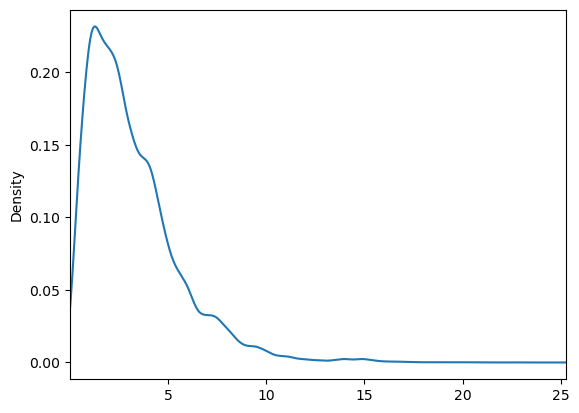

In [132]:
# Plot the KDE
main_df["dist"].plot.kde()

# Set x-axis limits to the range of the data
plt.xlim(main_df["dist"].min(), main_df["dist"].max())

# Display the plot
plt.show()

### - metro_dist: how far the listing is from the nearest metro stop

In [133]:
main_df["metro_dist"].describe()

count    51707.000000
mean         0.681540
std          0.858023
min          0.002301
25%          0.248480
50%          0.413269
75%          0.737840
max         14.273577
Name: metro_dist, dtype: float64

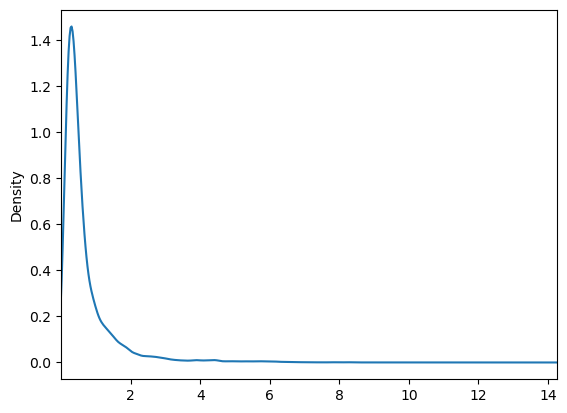

In [134]:
# Plot the KDE
main_df["metro_dist"].plot.kde()

# Set x-axis limits to the range of the data
plt.xlim(main_df["metro_dist"].min(), main_df["metro_dist"].max())

# Display the plot
plt.show()


### - attr_index: neighborhood attractiveness

In [135]:
main_df["attr_index"].describe()

count    51707.000000
mean       294.204105
std        224.754123
min         15.152201
25%        136.797385
50%        234.331748
75%        385.756381
max       4513.563486
Name: attr_index, dtype: float64

In [136]:
main_df["attr_index_norm"].describe()

count    51707.000000
mean        13.423792
std          9.807985
min          0.926301
25%          6.380926
50%         11.468305
75%         17.415082
max        100.000000
Name: attr_index_norm, dtype: float64

<Axes: >

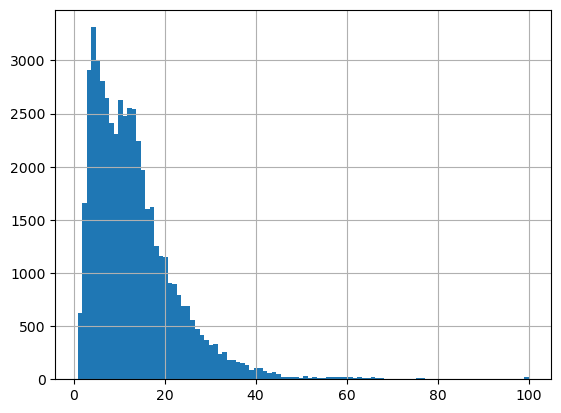

In [137]:
main_df["attr_index_norm"].hist(bins=100)

### - rest_index: restaurant index

In [138]:
main_df["rest_index"].describe()

count    51707.000000
mean       626.856696
std        497.920226
min         19.576924
25%        250.854114
50%        522.052783
75%        832.628988
max       6696.156772
Name: rest_index, dtype: float64

In [139]:
main_df["rest_index_norm"].describe()

count    51707.000000
mean        22.786177
std         17.804096
min          0.592757
25%          8.751480
50%         17.542238
75%         32.964603
max        100.000000
Name: rest_index_norm, dtype: float64

<Axes: >

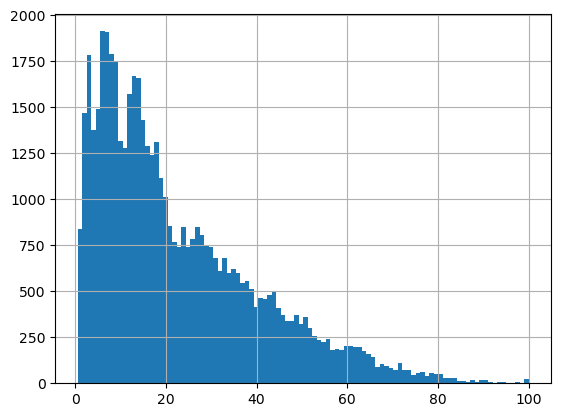

In [140]:
main_df["rest_index_norm"].hist(bins=100)

### - weekday: whether the stay happens on weekdays (except Friday & Saturday night) or weekend (Friday & Saturday night)

In [141]:
main_df["weekday"] = main_df["weekday"].astype("bool")

In [142]:
main_df["weekday"].value_counts()

False    26207
True     25500
Name: weekday, dtype: int64

### - city: the city where the listing is 

In [143]:
main_df["city"] = main_df["city"].astype("category")

# 3. Exploratory data analysis

In [144]:
# Bring them from tableau

# 4. Data processing 

## 4.1. Check numerical variables 

In [145]:
num_cols = ["realSum", 
            "person_capacity",
            "cleanliness_rating",
            "guest_satisfaction_overall",
            "bedrooms",
            "dist",
            "metro_dist", 
            "attr_index_norm", 
            "rest_index_norm", 
            "log_realSum"]

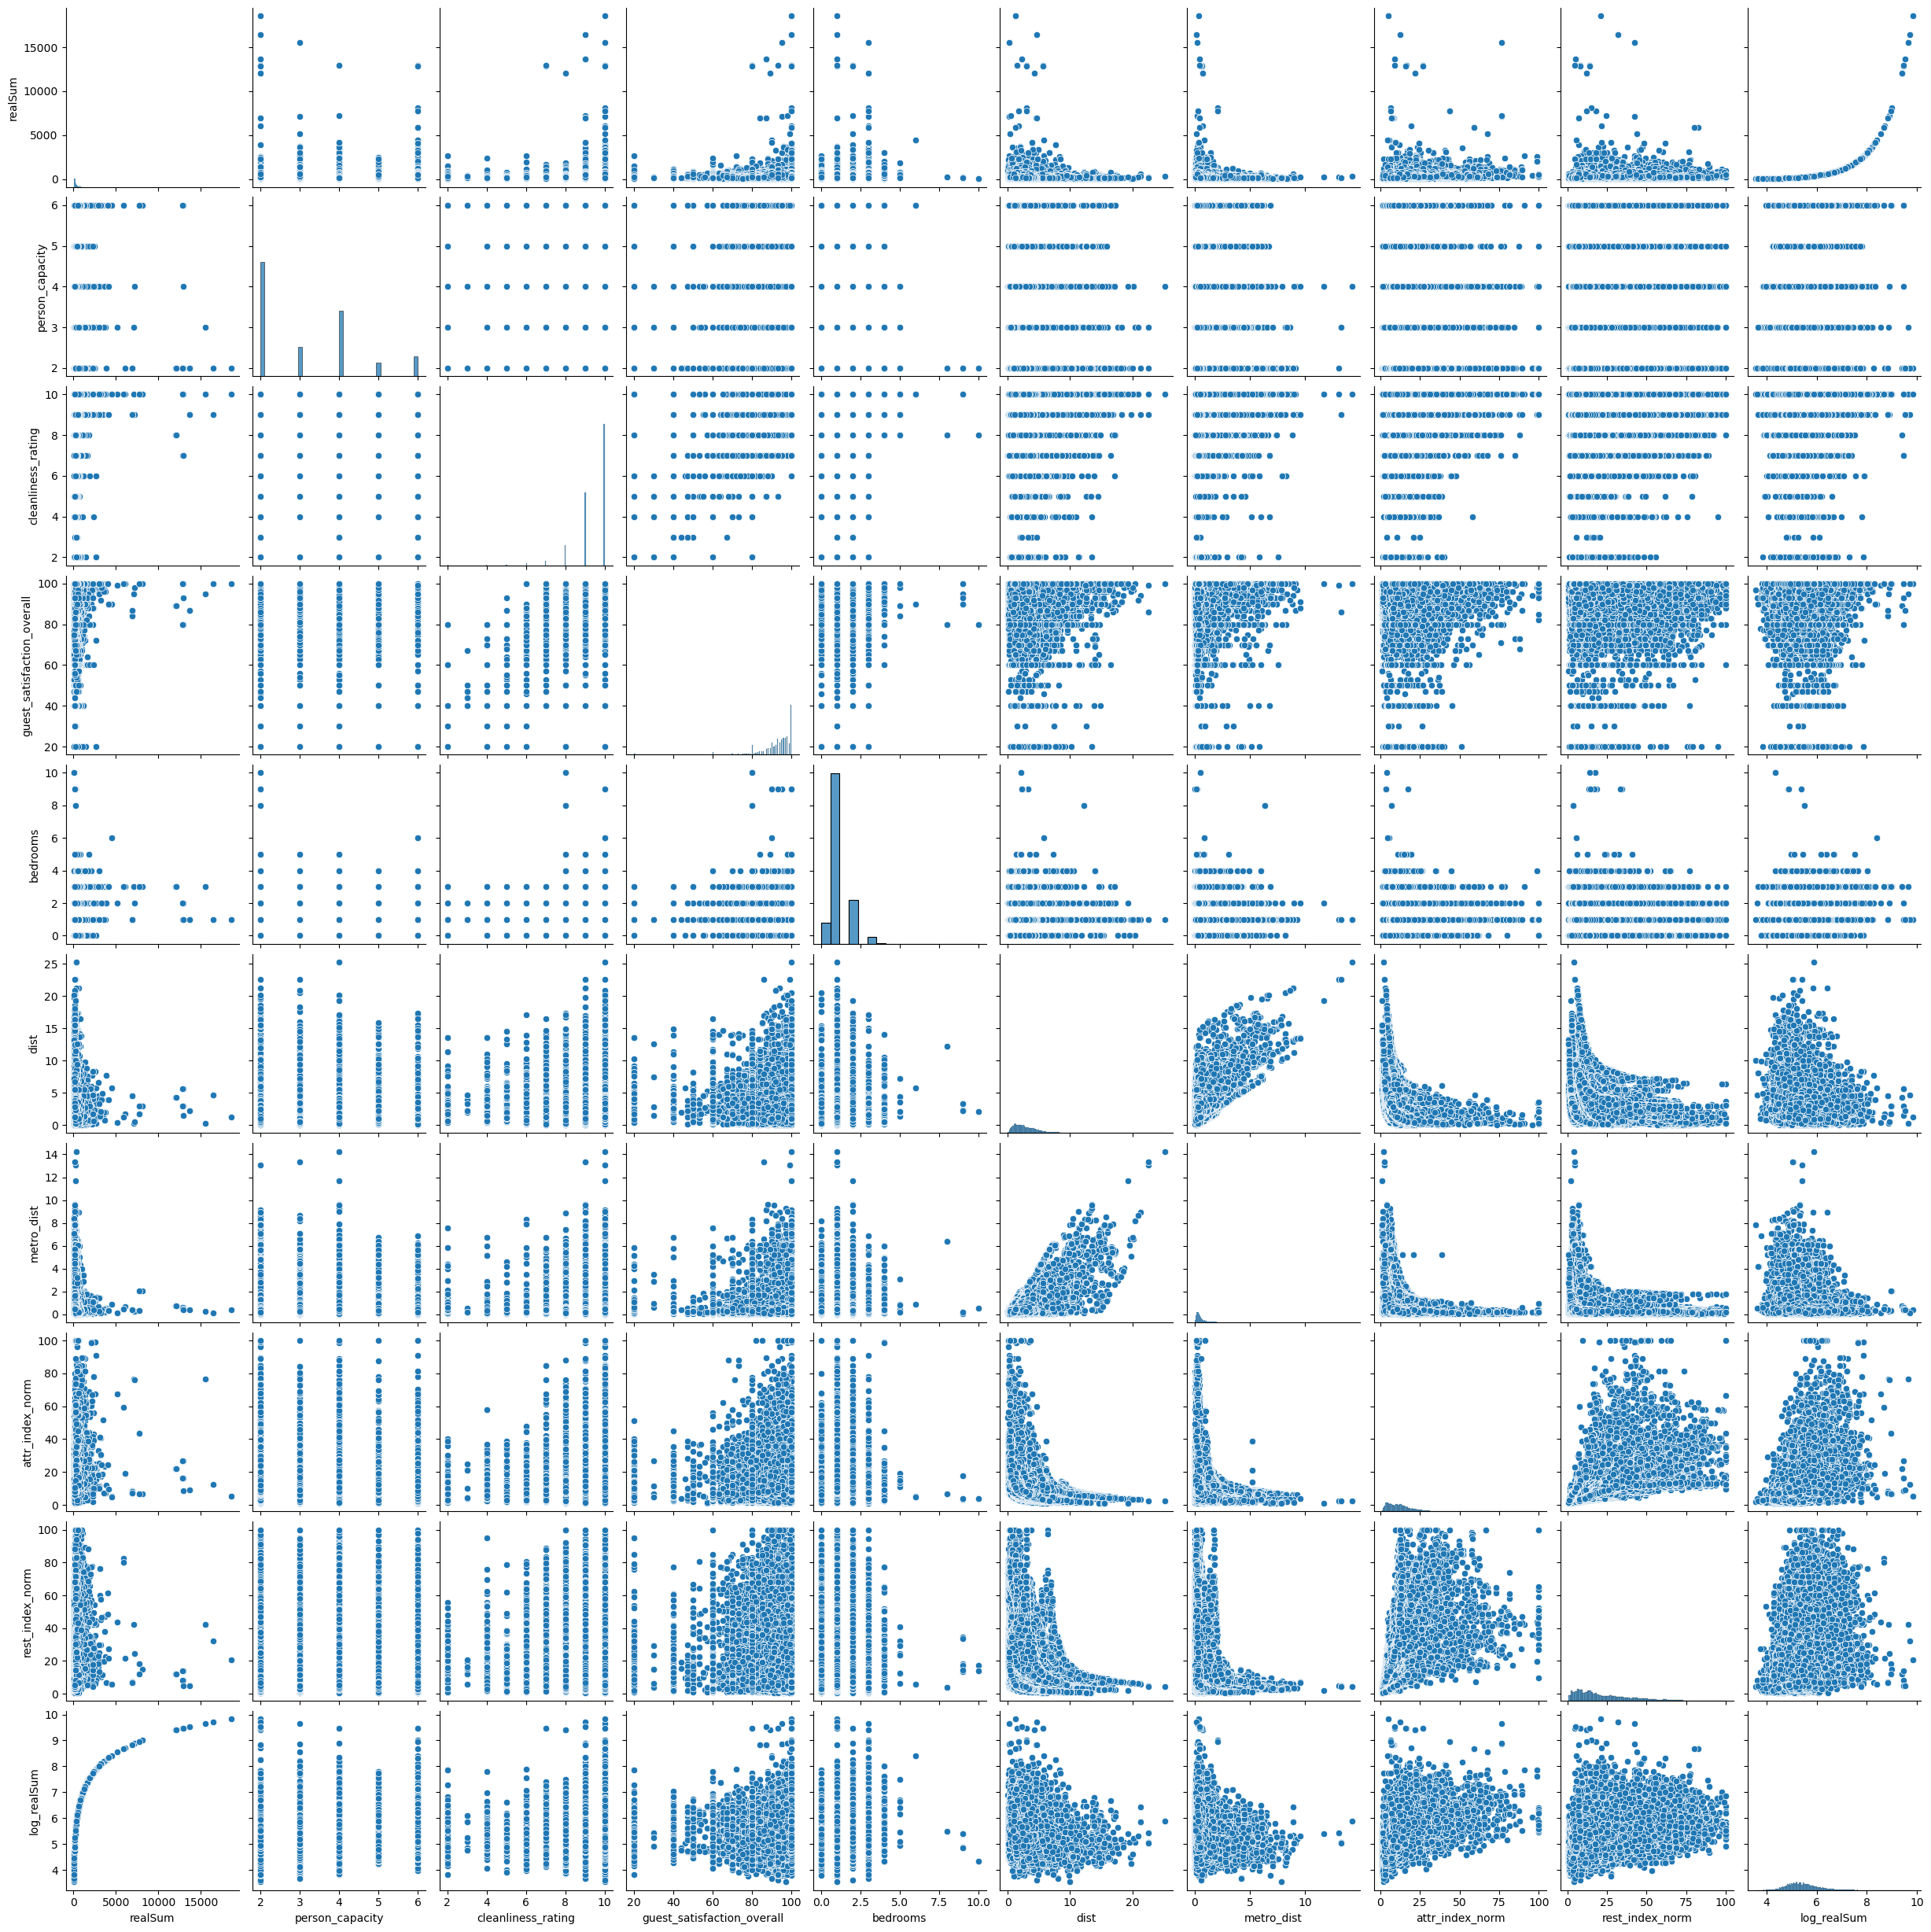

In [146]:
sns.pairplot(main_df[num_cols])

# Problems 
    1- Places that has more than 5 bedrooms are quite rare. 
    2- Listing with 0 bedrooms 
    3- Outliers within the realSum --> log_realSum looks better 


In [147]:
main_df.groupby('bedrooms').size().reset_index(name='count')

bedrooms  count
0         0   4485
1         1  36333
2         2   9290
3         3   1477
4         4     96
5         5     10
6         6      2
7         8      2
8         9     10
9        10      2

In [148]:
# Check the relationship between room_type and room_shared
pd.crosstab(main_df["person_capacity"], main_df["bedrooms"])

bedrooms           0      1     2    3   4   5   6   8   9   10
person_capacity                                                
2                2909  21103   250   33  20   4   0   2  10   2
3                 717   4921   501   19   5   2   0   0   0   0
4                 784   8935  4075  186  16   4   0   0   0   0
5                  42    822  1793  271   7   0   0   0   0   0
6                  33    552  2671  968  48   0   2   0   0   0

#### 
    -   Definition of bedroom depends on different variables. (https://www.airbnb.com/help/article/3400#:~:text=The%20space%20listed%20is%20a,bathroom%2C%20kitchen%2C%20or%20living%20room)

    - For the analysis, it might be better to use person_capacity instead of bedroom 

## 4.1. Check categorical variables and their relationship with realsum and log_realSum

Text(0, 0.5, 'realSum')

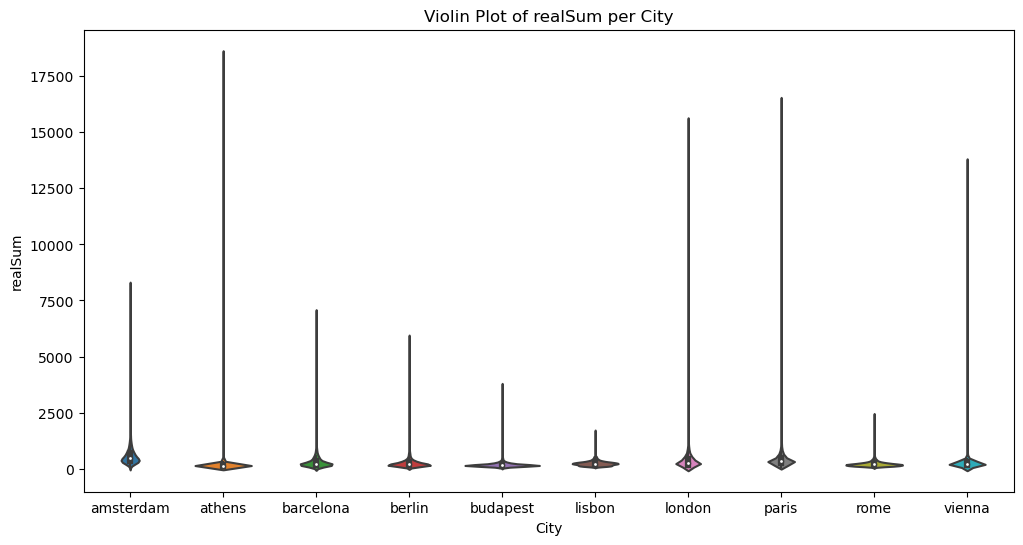

In [149]:
# Violin plot for realSum per city
plt.figure(figsize=(12, 6))
sns.violinplot(x='city', y='realSum', data=main_df)
plt.title('Violin Plot of realSum per City')
plt.xlabel('City')
plt.ylabel('realSum')


Text(0, 0.5, 'realSum')

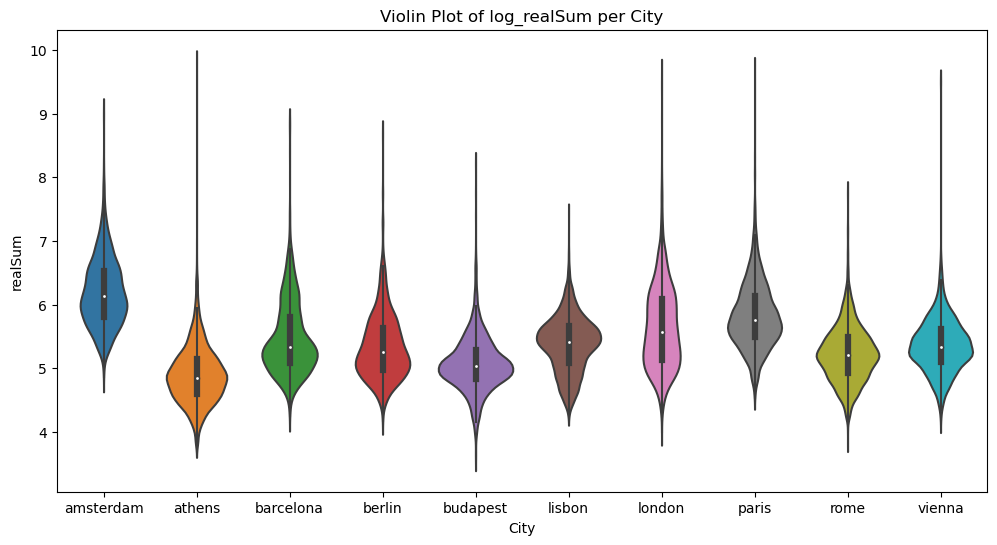

In [150]:
# Violin plot for log_realSum per city
plt.figure(figsize=(12, 6))
sns.violinplot(x='city', y='log_realSum', data=main_df)
plt.title('Violin Plot of log_realSum per City')
plt.xlabel('City')
plt.ylabel('realSum')

### Let's create a cap for realSum

In [151]:
# Check top 10 prices by city 
pd.set_option('display.max_rows', None)
main_df.groupby("city").apply(lambda x: x.sort_values(by="realSum", ascending=False).head(10))[["city","realSum"]].reset_index(drop = True)

city       realSum
0   amsterdam   8130.668104
1   amsterdam   7782.907225
2   amsterdam   3638.131840
3   amsterdam   3637.663159
4   amsterdam   3005.413259
5   amsterdam   3004.944579
6   amsterdam   2771.541724
7   amsterdam   2771.307384
8   amsterdam   2556.886087
9   amsterdam   2556.183067
10     athens  18545.450285
11     athens   1043.282638
12     athens   1043.282638
13     athens    869.167858
14     athens    869.167858
15     athens    776.603473
16     athens    747.545286
17     athens    707.004429
18     athens    707.004429
19     athens    684.273428
20  barcelona   6943.700980
21  barcelona   6943.700980
22  barcelona   6942.770033
23  barcelona   6942.770033
24  barcelona   6086.298787
25  barcelona   4467.149208
26  barcelona   4467.149208
27  barcelona   2950.636535
28  barcelona   1770.661205
29  barcelona   1770.661205
30     berlin   5857.483407
31     berlin   5856.081144
32     berlin   2319.341872
33     berlin   2318.874451
34     berlin   2317.004768
35     berlin   2316.303637
36     berlin   1507.431990
37     berlin   1507.431990
38     berlin   1507.431990
39     berlin   1507.198280
40   budapest   3751.233727
41   budapest   3630.681017
42   budapest   2330.215726
43   budapest   2328.335762
44   budapest   1650.373643
45   budapest   1614.419326
46   budapest   1078.864502
47   budapest    929.407341
48   budapest    917.892560
49   budapest    868.308502
50     lisbon   1681.050657
51     lisbon   1193.245779
52     lisbon   1188.086304
53     lisbon    987.101313
54     lisbon    973.968105
55     lisbon    891.181989
56     lisbon    887.664165
57     lisbon    887.429644
58     lisbon    876.407129
59     lisbon    867.729831
60     london  15499.894165
61     london  12937.275101
62     london  12929.513864
63     london  12886.239093
64     london  12886.239093
65     london  12076.953832
66     london  12048.731155
67     london   7759.354641
68     london   7759.354641
69     london   7223.829347
70      paris  16445.614689
71      paris   4188.414577
72      paris   4184.686364
73      paris   4068.645727
74      paris   4068.645727
75      paris   3338.381955
76      paris   3261.720570
77      paris   3260.322490
78      paris   3081.834281
79      paris   3081.834281
80       rome   2418.348023
81       rome   2311.738714
82       rome   2305.192528
83       rome   2286.956725
84       rome   2286.489140
85       rome   1907.044163
86       rome   1613.634770
87       rome   1384.752063
88       rome   1383.115517
89       rome   1383.115517
90     vienna  13664.305916
91     vienna  13656.358834
92     vienna  12942.991375
93     vienna    892.410537
94     vienna    881.191127
95     vienna    880.957390
96     vienna    811.771031
97     vienna    811.771031
98     vienna    811.303555
99     vienna    811.303555

# *DECISION*: eliminate the highest 3 prices from each city

In [152]:
# Sort the DataFrame by city and realSum in descending order
main_df['rank'] = main_df.groupby('city')['realSum'].rank(method='first', ascending=False)

# Filter out rows where rank is 1, 2, or 3
main_df = main_df[main_df['rank'] > 3].drop(columns=['rank'])


In [153]:
# Recreate normalized realSum based on the capped data 

# Log-transform the "realSum" column and create a new column
main_df['log_realSum'] = main_df['realSum'].apply(lambda x: np.log(x) if x > 0 else None)

In [154]:
# Check top 10 prices by city 
pd.set_option('display.max_rows', None)
main_df.groupby("city").apply(lambda x: x.sort_values(by="realSum", ascending=False).head(10))[["city","realSum"]].reset_index(drop = True)

city       realSum
0   amsterdam   3637.663159
1   amsterdam   3005.413259
2   amsterdam   3004.944579
3   amsterdam   2771.541724
4   amsterdam   2771.307384
5   amsterdam   2556.886087
6   amsterdam   2556.183067
7   amsterdam   2501.113116
8   amsterdam   2500.878776
9   amsterdam   2486.584023
10     athens    869.167858
11     athens    869.167858
12     athens    776.603473
13     athens    747.545286
14     athens    707.004429
15     athens    707.004429
16     athens    684.273428
17     athens    684.273428
18     athens    649.122396
19     athens    649.122396
20  barcelona   6942.770033
21  barcelona   6086.298787
22  barcelona   4467.149208
23  barcelona   4467.149208
24  barcelona   2950.636535
25  barcelona   1770.661205
26  barcelona   1770.661205
27  barcelona   1620.080527
28  barcelona   1620.080527
29  barcelona   1619.847790
30     berlin   2318.874451
31     berlin   2317.004768
32     berlin   2316.303637
33     berlin   1507.431990
34     berlin   1507.431990
35     berlin   1507.431990
36     berlin   1507.198280
37     berlin   1449.471815
38     berlin   1449.471815
39     berlin   1449.004394
40   budapest   2328.335762
41   budapest   1650.373643
42   budapest   1614.419326
43   budapest   1078.864502
44   budapest    929.407341
45   budapest    917.892560
46   budapest    868.308502
47   budapest    843.163980
48   budapest    817.079475
49   budapest    793.344926
50     lisbon    987.101313
51     lisbon    973.968105
52     lisbon    891.181989
53     lisbon    887.664165
54     lisbon    887.429644
55     lisbon    876.407129
56     lisbon    867.729831
57     lisbon    860.928705
58     lisbon    857.410882
59     lisbon    780.956848
60     london  12886.239093
61     london  12886.239093
62     london  12076.953832
63     london  12048.731155
64     london   7759.354641
65     london   7759.354641
66     london   7223.829347
67     london   7115.642419
68     london   5166.631388
69     london   3874.973541
70      paris   4068.645727
71      paris   4068.645727
72      paris   3338.381955
73      paris   3261.720570
74      paris   3260.322490
75      paris   3081.834281
76      paris   3081.834281
77      paris   3037.095722
78      paris   2970.220897
79      paris   2967.424737
80       rome   2286.956725
81       rome   2286.489140
82       rome   1907.044163
83       rome   1613.634770
84       rome   1384.752063
85       rome   1383.115517
86       rome   1383.115517
87       rome   1380.777593
88       rome   1281.883431
89       rome   1268.089683
90     vienna    892.410537
91     vienna    881.191127
92     vienna    880.957390
93     vienna    811.771031
94     vienna    811.771031
95     vienna    811.303555
96     vienna    811.303555
97     vienna    765.257228
98     vienna    765.257228
99     vienna    750.765491

Text(0, 0.5, 'realSum')

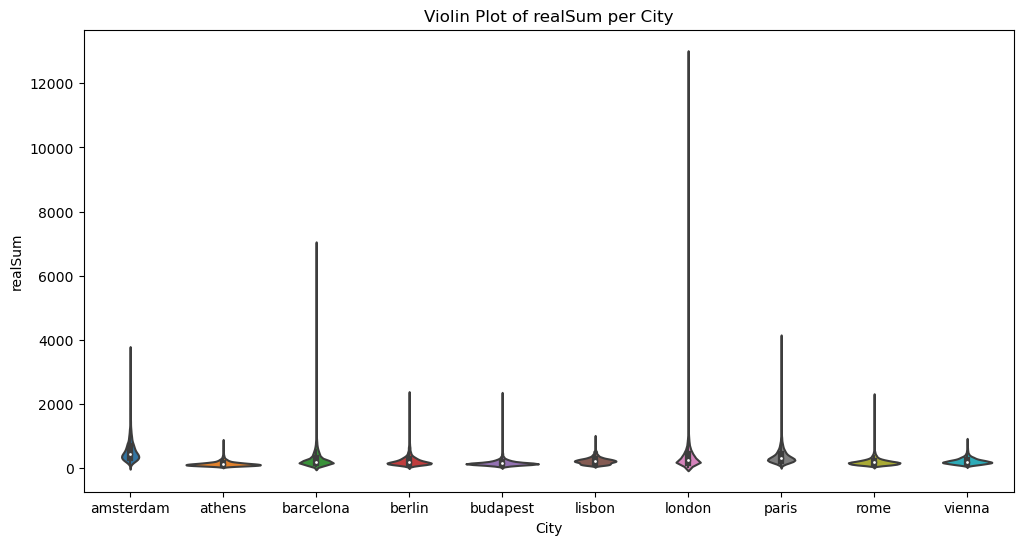

In [155]:
# Violin plot for realSum per city
plt.figure(figsize=(12, 6))
sns.violinplot(x='city', y='realSum', data=main_df)
plt.title('Violin Plot of realSum per City')
plt.xlabel('City')
plt.ylabel('realSum')

Text(0, 0.5, 'realSum')

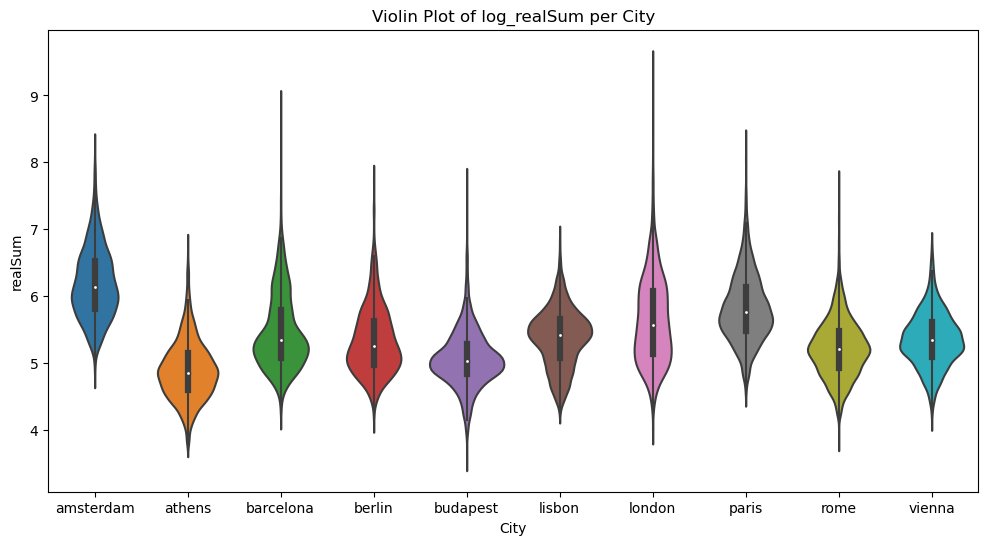

In [156]:
# Violin plot for log_realSum per city
plt.figure(figsize=(12, 6))
sns.violinplot(x='city', y='log_realSum', data=main_df)
plt.title('Violin Plot of log_realSum per City')
plt.xlabel('City')
plt.ylabel('realSum')

Text(0, 0.5, 'realSum')

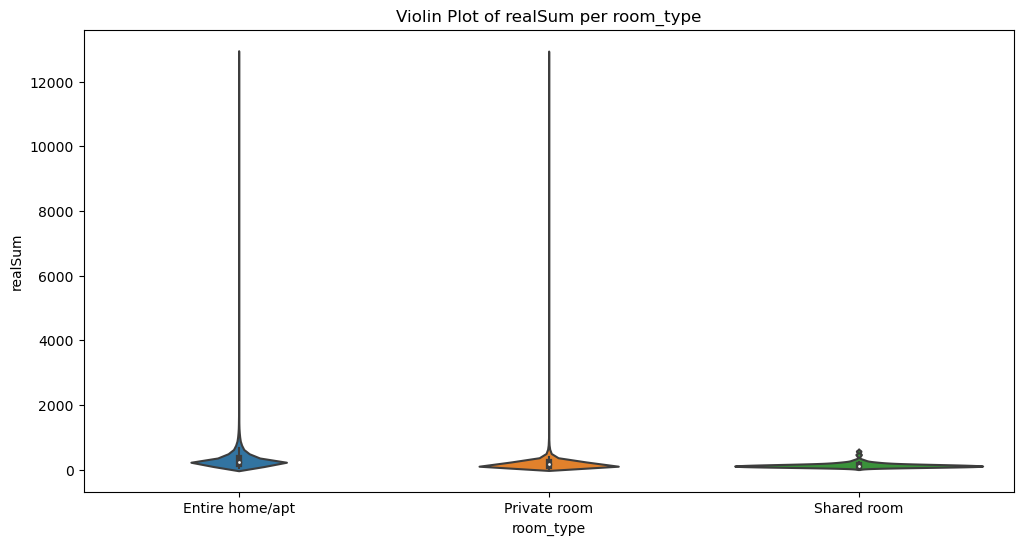

In [157]:
# Violin plot for realSum per room_type
plt.figure(figsize=(12, 6))
sns.violinplot(x='room_type', y='realSum', data=main_df)
plt.title('Violin Plot of realSum per room_type')
plt.xlabel('room_type')
plt.ylabel('realSum')

Text(0, 0.5, 'realSum')

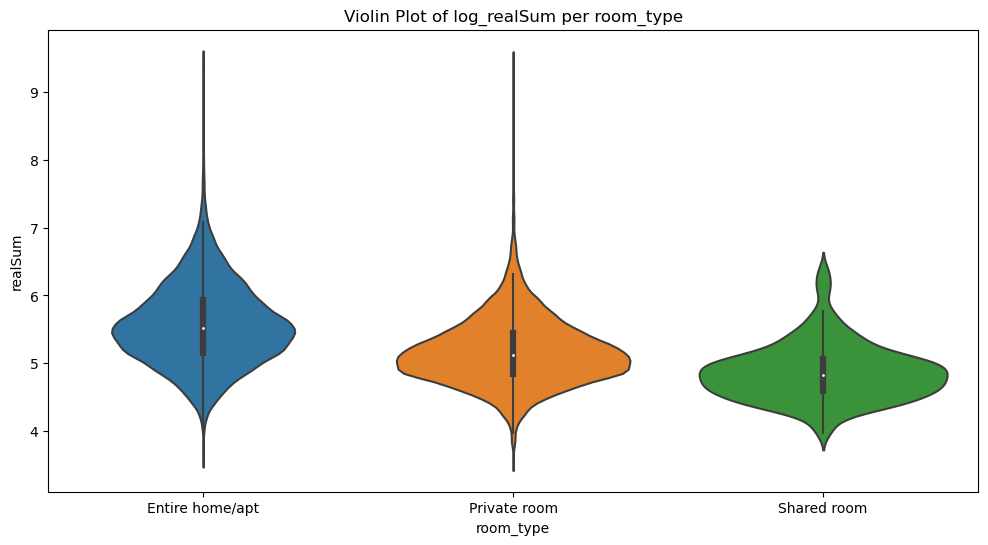

In [158]:
# Violin plot for log_realSum per room_type
plt.figure(figsize=(12, 6))
sns.violinplot(x='room_type', y='log_realSum', data=main_df)
plt.title('Violin Plot of log_realSum per room_type')
plt.xlabel('room_type')
plt.ylabel('realSum')

The distribution seems okay

## Check relationship with price 

### Room type vs price 
Use only entire apt and private room since shared room is quite few 

In [159]:
temp_df = main_df[main_df['city'] != "Shared room"]

In [160]:
temp_df["room_type"].value_counts()

Entire home/apt    32624
Private room       18687
Shared room          366
Name: room_type, dtype: int64

In [161]:

# Initialize results list
results = []

# Group by city and perform t-test and Cohen's d calculation
for city, group in temp_df.groupby('city'):
    # Separate data for the two groups (superhost and non-superhost)
    group1 = group[group['room_type'] == "Entire home/apt" ]['realSum']
    group2 = group[group['room_type'] == "Private room" ]['realSum']
    
    # Perform t-test (Welch's t-test)
    ttest_result = ttest_ind(group1, group2, equal_var=False)
    
    # Calculate Cohen's d
    mean1 = group1.mean()
    mean2 = group2.mean()
    var1 = group1.var()
    var2 = group2.var()
    n1 = len(group1)
    n2 = len(group2)
    
    cohen_d = (mean1 - mean2) / np.sqrt((var1 / n1) + (var2 / n2))

    # Append results for each city
    results.append({
        'city': city,
        'p_value': ttest_result.pvalue,
        'cohen_d': cohen_d
    })

# Convert results to a DataFrame
room_type_results_results = pd.DataFrame(results)

# Format the numbers to display without scientific notation
room_type_results_results['p_value'] = room_type_results_results['p_value'].apply(lambda x: f"{x:.6f}")
room_type_results_results['cohen_d'] = room_type_results_results['cohen_d'].apply(lambda x: f"{x:.6f}")

# Display the results
print(room_type_results_results)

        city   p_value    cohen_d
0  amsterdam  0.000000  25.236402
1     athens  0.000000   7.533392
2  barcelona  0.000000  17.641658
3     berlin  0.000000  22.977299
4   budapest  0.000000  20.711923
5     lisbon  0.000000  66.359813
6     london  0.000000  40.528980
7      paris  0.000000  20.828076
8       rome  0.000000  47.261674
9     vienna  0.000000  28.808991


### Result: 
Statistical significance between room type and price for each city 

In [162]:
main_df["host_is_superhost"].value_counts()

False    38451
True     13226
Name: host_is_superhost, dtype: int64

### host_is_superhost vs price

In [163]:


# Initialize results list
results = []

# Group by city and perform t-test and Cohen's d calculation
for city, group in main_df.groupby('city'):
    # Separate data for the two groups (superhost and non-superhost)
    group1 = group[group['host_is_superhost'] == False ]['log_realSum']
    group2 = group[group['host_is_superhost'] == True ]['log_realSum']
    
    # Perform t-test (Welch's t-test)
    ttest_result = ttest_ind(group1, group2, equal_var=False)
    
    # Calculate Cohen's d
    mean1 = group1.mean()
    mean2 = group2.mean()
    var1 = group1.var()
    var2 = group2.var()
    n1 = len(group1)
    n2 = len(group2)
    
    cohen_d = (mean1 - mean2) / np.sqrt((var1 / n1) + (var2 / n2))

    # Append results for each city
    results.append({
        'city': city,
        'p_value': ttest_result.pvalue,
        'cohen_d': cohen_d
    })

# Convert results to a DataFrame
superhost_results = pd.DataFrame(results)

# Format the numbers to display without scientific notation
superhost_results['p_value'] = superhost_results['p_value'].apply(lambda x: f"{x:.6f}")
superhost_results['cohen_d'] = superhost_results['cohen_d'].apply(lambda x: f"{x:.6f}")

# Display the results
print(superhost_results)



        city   p_value    cohen_d
0  amsterdam  0.001732   3.140770
1     athens  0.000000  -7.755186
2  barcelona  0.008142  -2.652918
3     berlin  0.913414   0.108757
4   budapest  0.677359   0.416102
5     lisbon  0.000000  -6.538950
6     london  0.000022   4.252123
7      paris  0.000055  -4.046212
8       rome  0.000000  -6.949037
9     vienna  0.000158  -3.785712


### Result 
Significance relationship between price and host_is_superhost for some cities 

### Superhost vs guest_sarisfaction_overall 

In [164]:


# Initialize results list
results = []

# Group by city and perform t-test and Cohen's d calculation
for city, group in main_df.groupby('city'):
    # Separate data for the two groups (superhost and non-superhost)
    group1 = group[group['host_is_superhost'] == False ]['guest_satisfaction_overall']
    group2 = group[group['host_is_superhost'] == True ]['guest_satisfaction_overall']
    
    # Perform t-test (Welch's t-test)
    ttest_result = ttest_ind(group1, group2, equal_var=False)
    
    # Calculate Cohen's d
    mean1 = group1.mean()
    mean2 = group2.mean()
    var1 = group1.var()
    var2 = group2.var()
    n1 = len(group1)
    n2 = len(group2)
    
    cohen_d = (mean1 - mean2) / np.sqrt((var1 / n1) + (var2 / n2))

    # Append results for each city
    results.append({
        'city': city,
        'p_value': ttest_result.pvalue,
        'cohen_d': cohen_d
    })

# Convert results to a DataFrame
superhost_reviews_results = pd.DataFrame(results)

# Format the numbers to display without scientific notation
superhost_reviews_results['p_value'] = superhost_reviews_results['p_value'].apply(lambda x: f"{x:.6f}")
superhost_reviews_results['cohen_d'] = superhost_reviews_results['cohen_d'].apply(lambda x: f"{x:.6f}")

# Display the results
print(superhost_reviews_results)



        city   p_value     cohen_d
0  amsterdam  0.000000  -18.240202
1     athens  0.000000  -21.843902
2  barcelona  0.000000  -29.007674
3     berlin  0.000000  -20.655476
4   budapest  0.000000  -23.071870
5     lisbon  0.000000  -32.263186
6     london  0.000000  -42.360781
7      paris  0.000000  -28.584600
8       rome  0.000000  -44.840402
9     vienna  0.000000  -23.638436


### Result 
Significance relationship between guest_satisfaction_overall and host_is_superhost

### Price vs weekend 

In [165]:

# Initialize results list
results = []

# Group by city and perform t-test and Cohen's d calculation
for city, group in main_df.groupby('city'):
    # Separate data for the two groups (superhost and non-superhost)
    group1 = group[group['weekday'] == False ]['log_realSum']
    group2 = group[group['weekday'] == True ]['log_realSum']
    
    # Perform t-test (Welch's t-test)
    ttest_result = ttest_ind(group1, group2, equal_var=False)
    
    # Calculate Cohen's d
    mean1 = group1.mean()
    mean2 = group2.mean()
    var1 = group1.var(ddof=1)
    var2 = group2.var(ddof=1)
    n1 = len(group1)
    n2 = len(group2)
    
    cohen_d = (mean1 - mean2) / np.sqrt((var1 / n1) + (var2 / n2))

    # Append results for each city
    results.append({
        'city': city,
        'p_value': ttest_result.pvalue,
        'cohen_d': cohen_d
    })

# Convert results to a DataFrame
weekday_results = pd.DataFrame(results)

# Format the numbers to display without scientific notation
weekday_results['p_value'] = weekday_results['p_value'].apply(lambda x: f"{x:.6f}")
weekday_results['cohen_d'] = weekday_results['cohen_d'].apply(lambda x: f"{x:.6f}")

# Display the results
print(weekday_results)



        city   p_value    cohen_d
0  amsterdam  0.000001   4.979650
1     athens  0.573516  -0.562915
2  barcelona  0.704163   0.379748
3     berlin  0.129121   1.518090
4   budapest  0.000000   6.640719
5     lisbon  0.208322   1.258333
6     london  0.018545   2.354955
7      paris  0.594181  -0.532814
8       rome  0.000045   4.081801
9     vienna  0.008702   2.625024


### Result 
Significant for some cities 

### Biz vs price

In [166]:
main_df['biz'].value_counts()

False    33577
True     18100
Name: biz, dtype: int64

In [167]:

# Initialize results list
results = []

# Group by city and perform t-test and Cohen's d calculation
for city, group in main_df.groupby('city'):
    # Separate data for the two groups (superhost and non-superhost)
    group1 = group[group['biz'] == False ]['log_realSum']
    group2 = group[group['biz'] == True ]['log_realSum']
    
    # Perform t-test (Welch's t-test)
    ttest_result = ttest_ind(group1, group2, equal_var=False)
    
    # Calculate Cohen's d
    mean1 = group1.mean()
    mean2 = group2.mean()
    var1 = group1.var(ddof=1)
    var2 = group2.var(ddof=1)
    n1 = len(group1)
    n2 = len(group2)
    
    cohen_d = (mean1 - mean2) / np.sqrt((var1 / n1) + (var2 / n2))

    # Append results for each city
    results.append({
        'city': city,
        'p_value': ttest_result.pvalue,
        'cohen_d': cohen_d
    })

# Convert results to a DataFrame
biz_results = pd.DataFrame(results)

# Format the numbers to display without scientific notation
biz_results['p_value'] = biz_results['p_value'].apply(lambda x: f"{x:.6f}")
biz_results['cohen_d'] = biz_results['cohen_d'].apply(lambda x: f"{x:.6f}")

# Display the results
print(biz_results)



        city   p_value     cohen_d
0  amsterdam  0.746445   -0.323635
1     athens  0.000000  -18.517159
2  barcelona  0.000000  -21.546345
3     berlin  0.000000   -8.917759
4   budapest  0.000000   -6.411408
5     lisbon  0.008529    2.631419
6     london  0.000000  -18.157391
7      paris  0.000000  -12.830842
8       rome  0.000000   -6.150599
9     vienna  0.000000  -12.718513


In [168]:
main_df['multi'].value_counts()

False    36617
True     15060
Name: multi, dtype: int64

### Multi vs price

In [169]:

# Initialize results list
results = []

# Group by city and perform t-test and Cohen's d calculation
for city, group in main_df.groupby('city'):
    # Separate data for the two groups (superhost and non-superhost)
    group1 = group[group['multi'] == False ]['log_realSum']
    group2 = group[group['multi'] == True ]['log_realSum']
    
    # Perform t-test (Welch's t-test)
    ttest_result = ttest_ind(group1, group2, equal_var=False)
    
    # Calculate Cohen's d
    mean1 = group1.mean()
    mean2 = group2.mean()
    var1 = group1.var(ddof=1)
    var2 = group2.var(ddof=1)
    n1 = len(group1)
    n2 = len(group2)
    
    cohen_d = (mean1 - mean2) / np.sqrt((var1 / n1) + (var2 / n2))

    # Append results for each city
    results.append({
        'city': city,
        'p_value': ttest_result.pvalue,
        'cohen_d': cohen_d
    })

# Convert results to a DataFrame
multi_results = pd.DataFrame(results)

# Format the numbers to display without scientific notation
multi_results['p_value'] = multi_results['p_value'].apply(lambda x: f"{x:.6f}")
multi_results['cohen_d'] = multi_results['cohen_d'].apply(lambda x: f"{x:.6f}")

# Display the results
print(multi_results)



        city   p_value    cohen_d
0  amsterdam  0.000000   8.811308
1     athens  0.000000   7.382561
2  barcelona  0.000000  13.032296
3     berlin  0.007210  -2.691302
4   budapest  0.000000   7.827741
5     lisbon  0.000000   5.094246
6     london  0.000000   7.966688
7      paris  0.116535  -1.570094
8       rome  0.000000   8.215154
9     vienna  0.000024   4.231000


## Prepare categorical variable
In order to be able to use categorical variables within models, let's do label encoding

In [170]:
main_df.dtypes

realSum                        float64
room_type                     category
room_shared                       bool
room_private                      bool
person_capacity                  int64
host_is_superhost                 bool
multi                             bool
biz                               bool
cleanliness_rating               int64
guest_satisfaction_overall     float64
bedrooms                         int64
dist                           float64
metro_dist                     float64
attr_index                     float64
attr_index_norm                float64
rest_index                     float64
rest_index_norm                float64
lng                            float64
lat                            float64
weekday                           bool
city                          category
log_realSum                    float64
dtype: object

In [171]:
label_df = main_df

In [172]:
cat_cols = ["room_type", "city", "host_is_superhost", "multi", "biz", "weekday"]

label_encoder = LabelEncoder()
for col in cat_cols:
    label_df[col] = label_encoder.fit_transform(label_df[col])
label_df.head()

realSum  room_type  room_shared  room_private  person_capacity  \
0  121.122322          1        False          True                2   
1  195.912416          1        False          True                2   
2  193.325337          1        False          True                3   
3  180.389943          1        False          True                2   
4  405.700981          0        False         False                3   

   host_is_superhost  multi  biz  cleanliness_rating  \
0                  0      0    0                   6   
1                  0      1    0                  10   
2                  0      1    0                  10   
3                  0      1    0                   9   
4                  0      0    1                   7   

   guest_satisfaction_overall  ...  metro_dist  attr_index  attr_index_norm  \
0                        69.0  ...    0.437094  222.882243        15.493414   
1                        96.0  ...    1.464050  235.385841        16.362588   
2                        95.0  ...    0.450306  268.913812        18.693247   
3                        87.0  ...    0.132670  472.381314        32.837067   
4                        65.0  ...    0.354108  318.491470        22.139584   

    rest_index  rest_index_norm      lng       lat  weekday  city  log_realSum  
0   470.088502         8.413765 -0.04975  51.52570        0     6     4.796801  
1   530.133525         9.488466 -0.08475  51.54210        0     6     5.277668  
2   548.987610         9.825922 -0.14585  51.54802        0     6     5.264374  
3  1021.271062        18.278973 -0.10611  51.52108        0     6     5.195121  
4   692.775411        12.399473 -0.18797  51.49399        0     6     6.005616  

[5 rows x 22 columns]

## Feature engineering

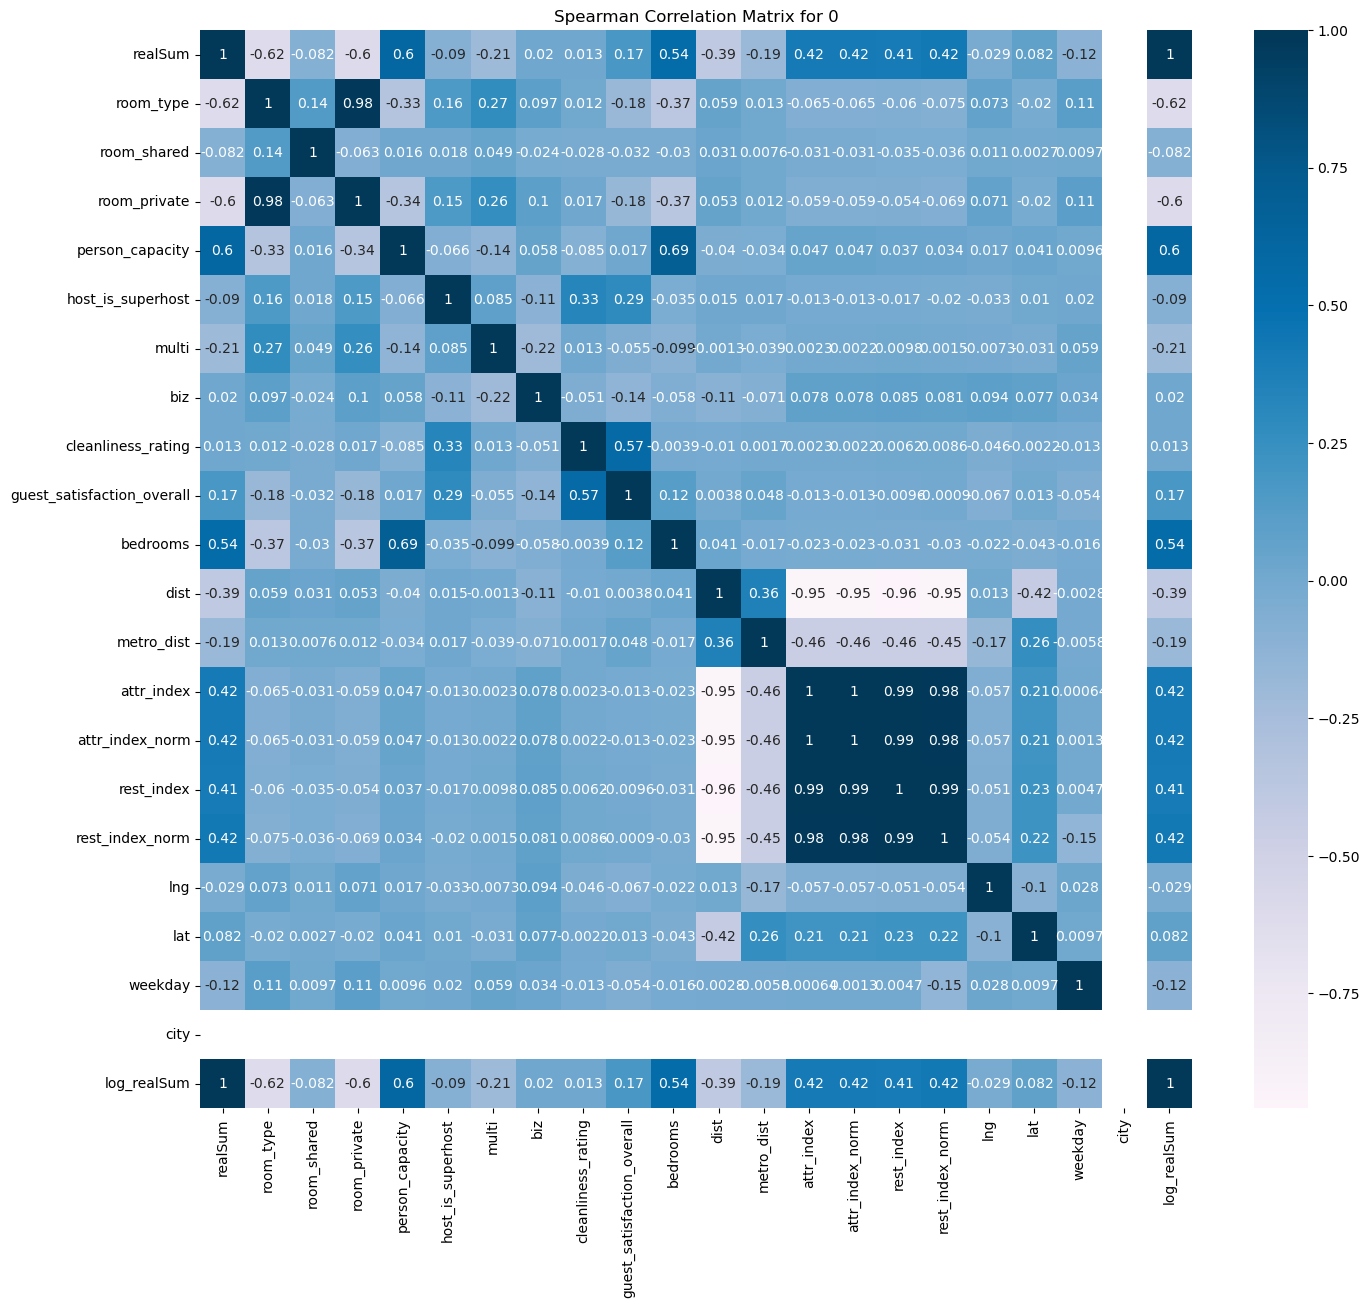

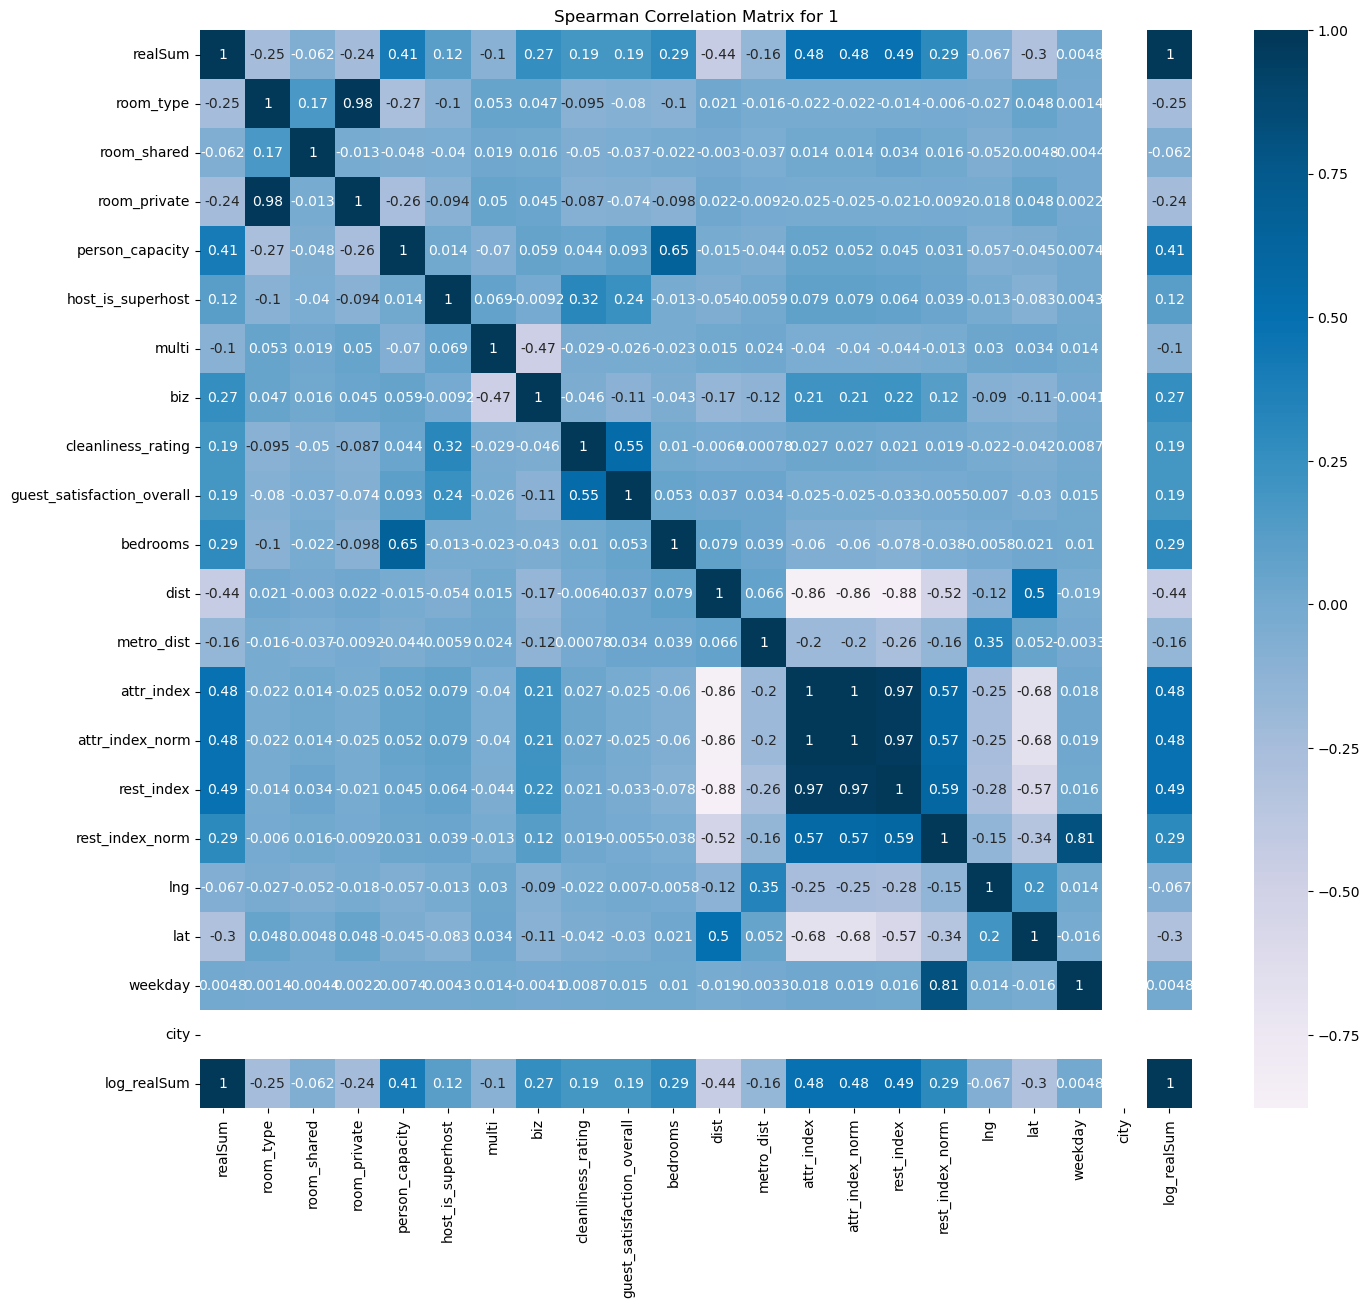

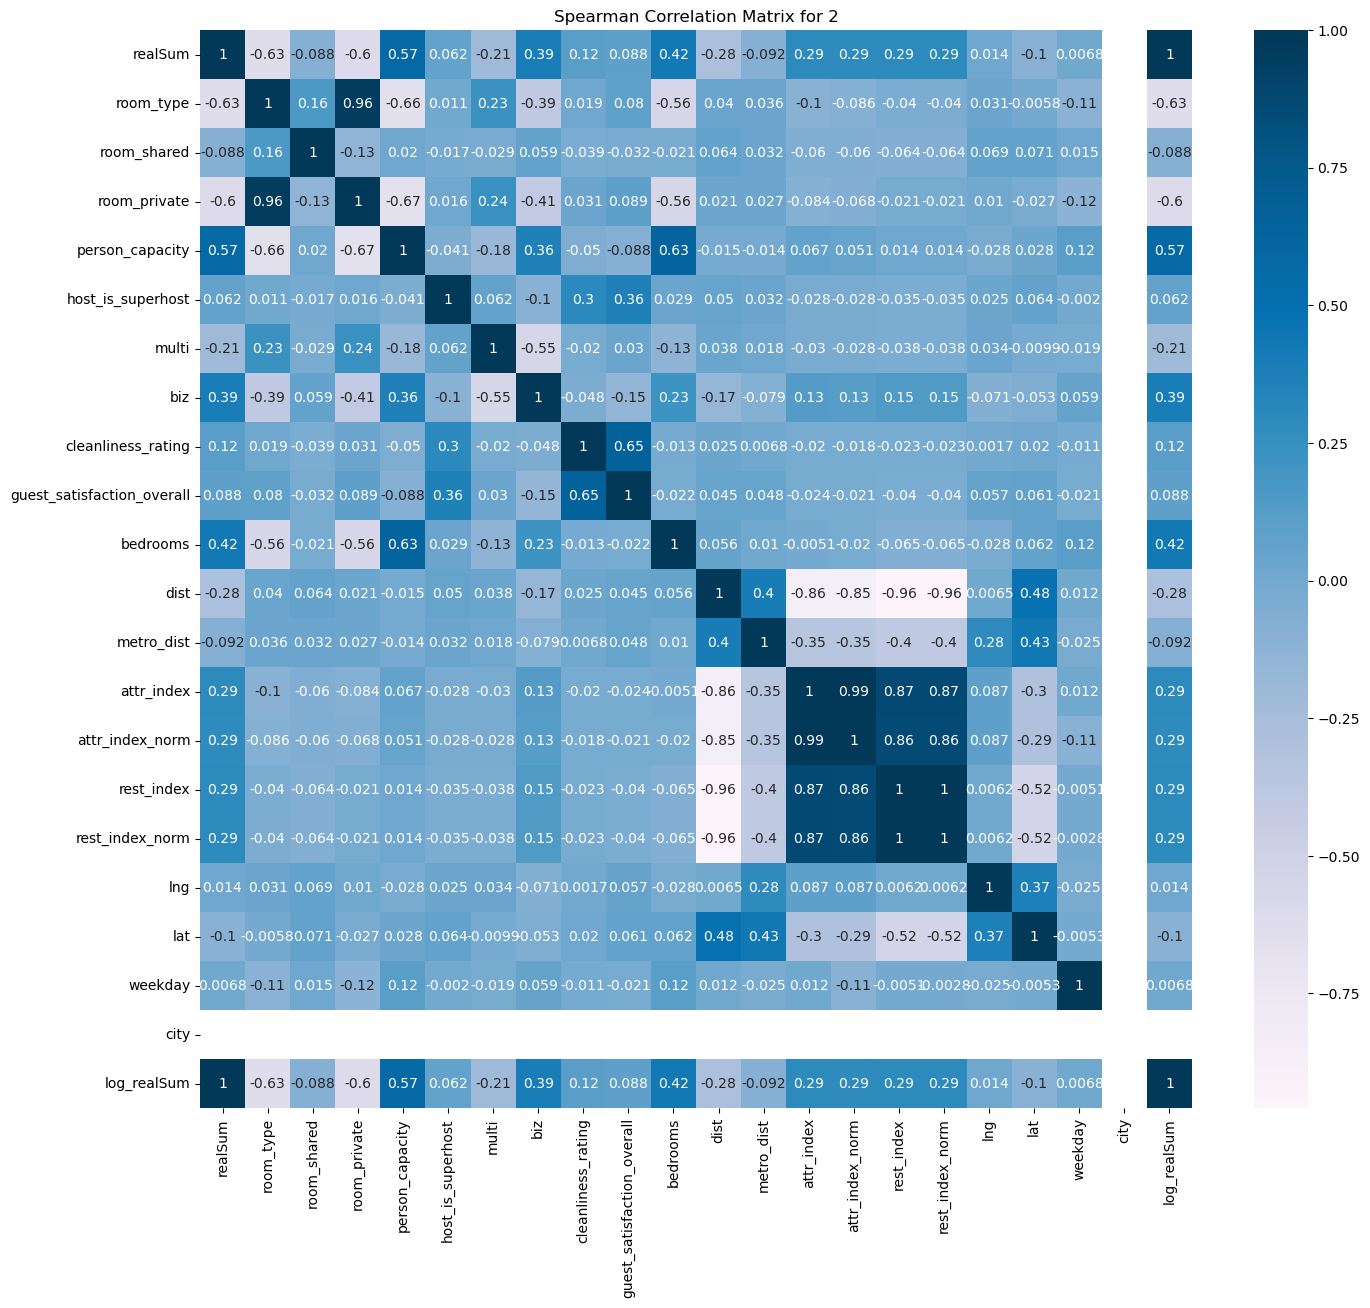

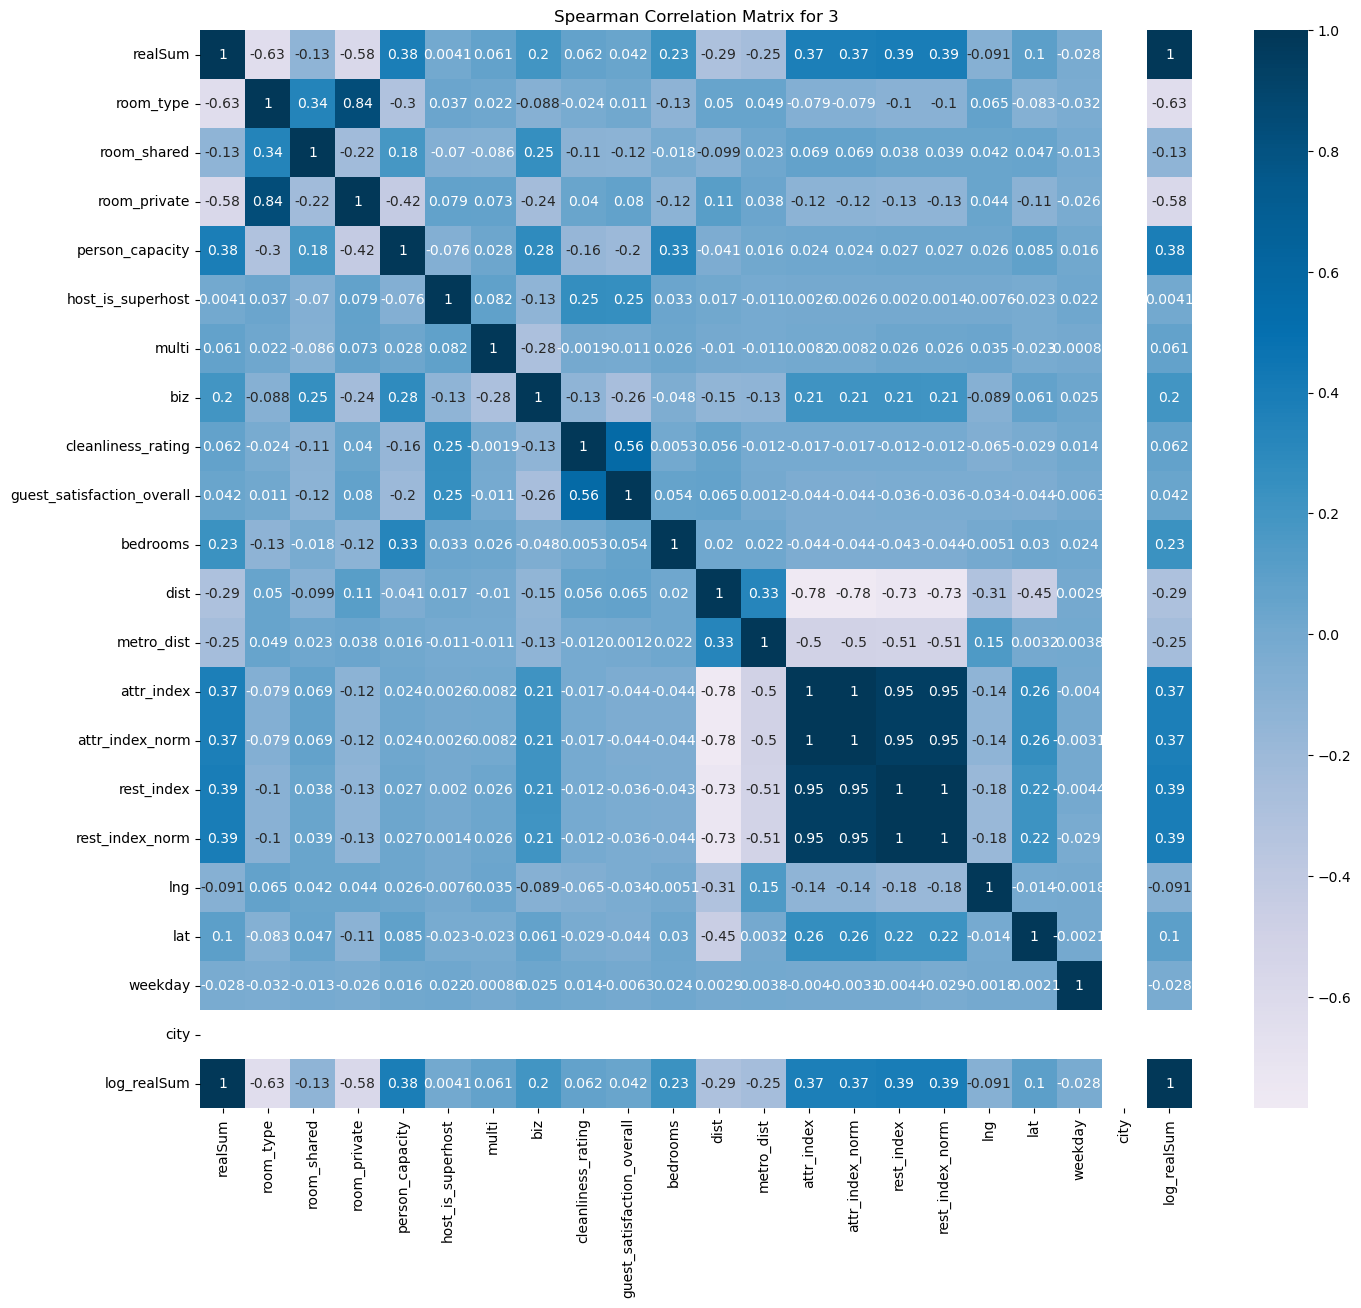

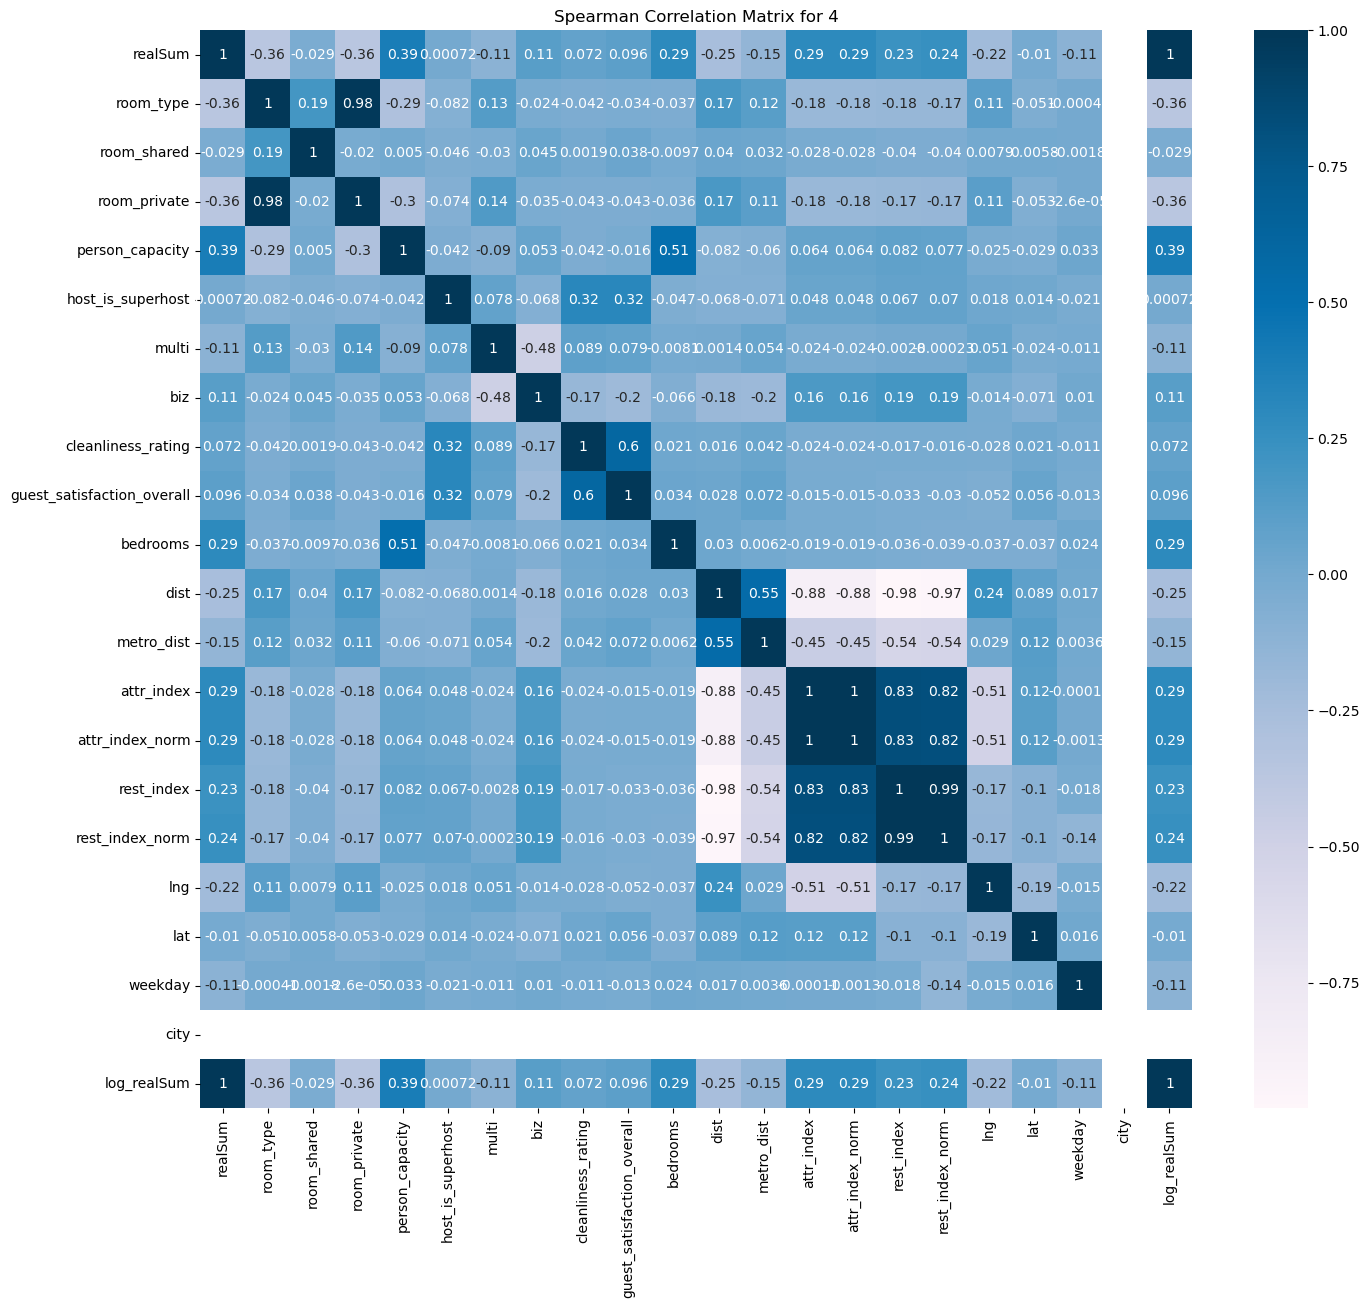

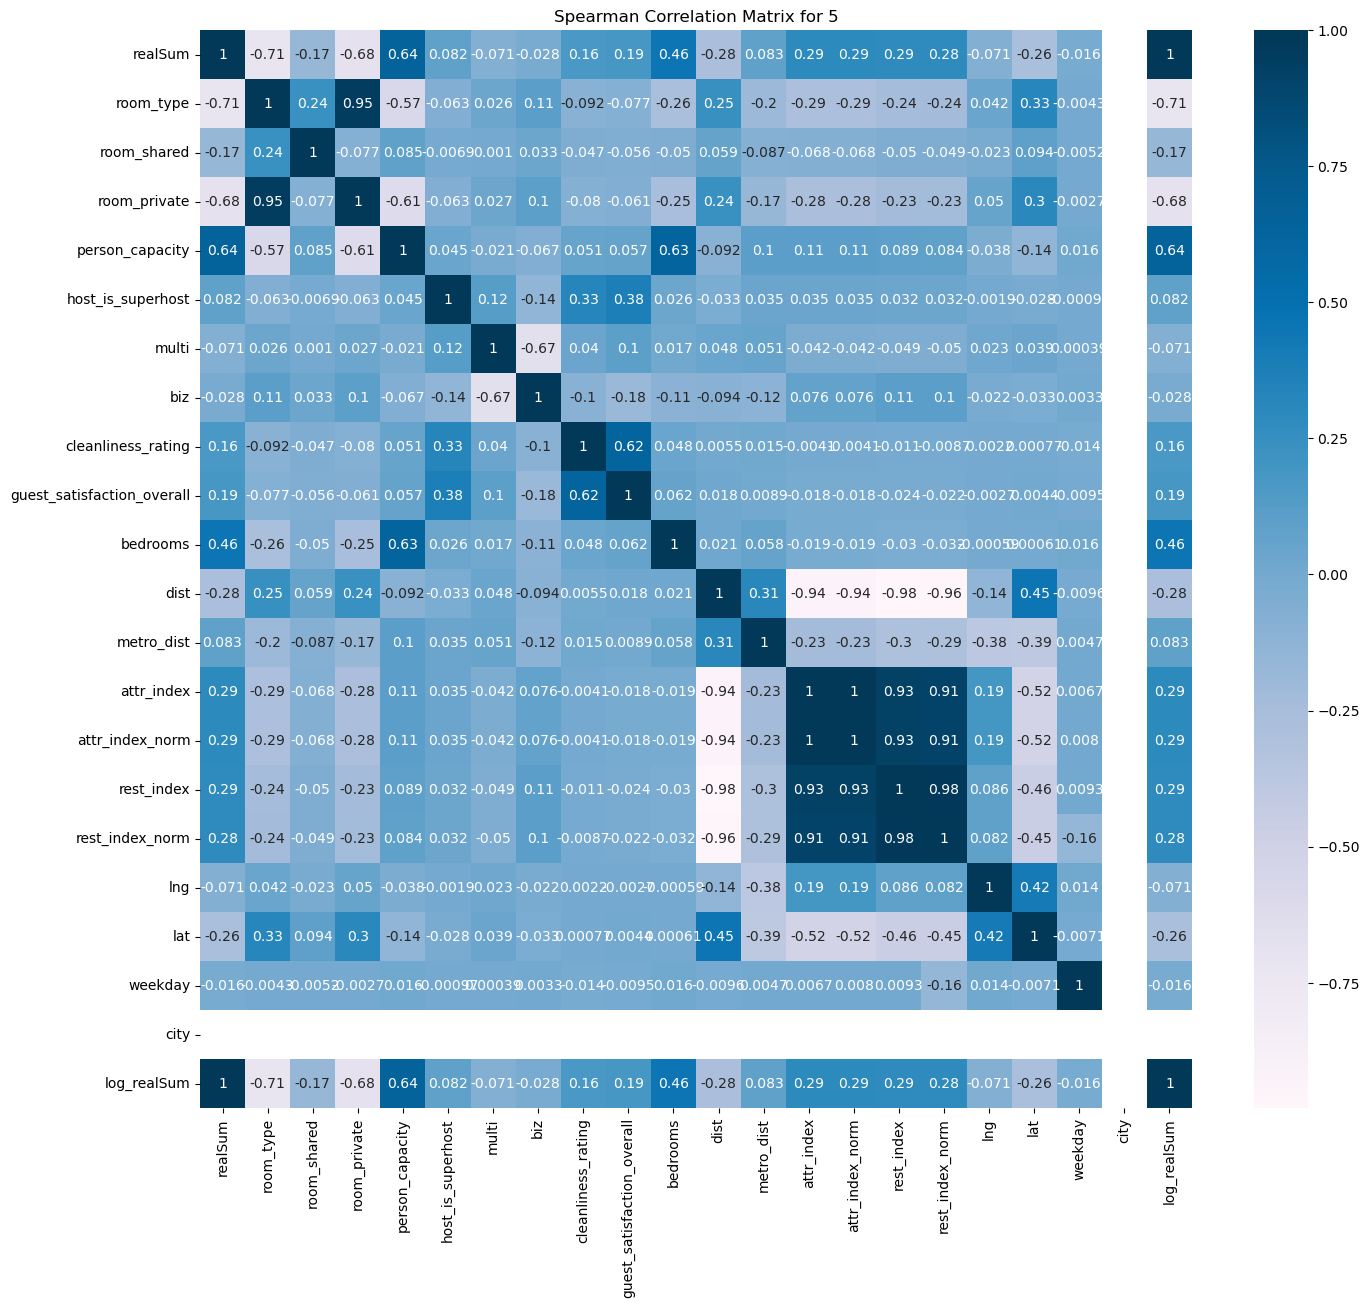

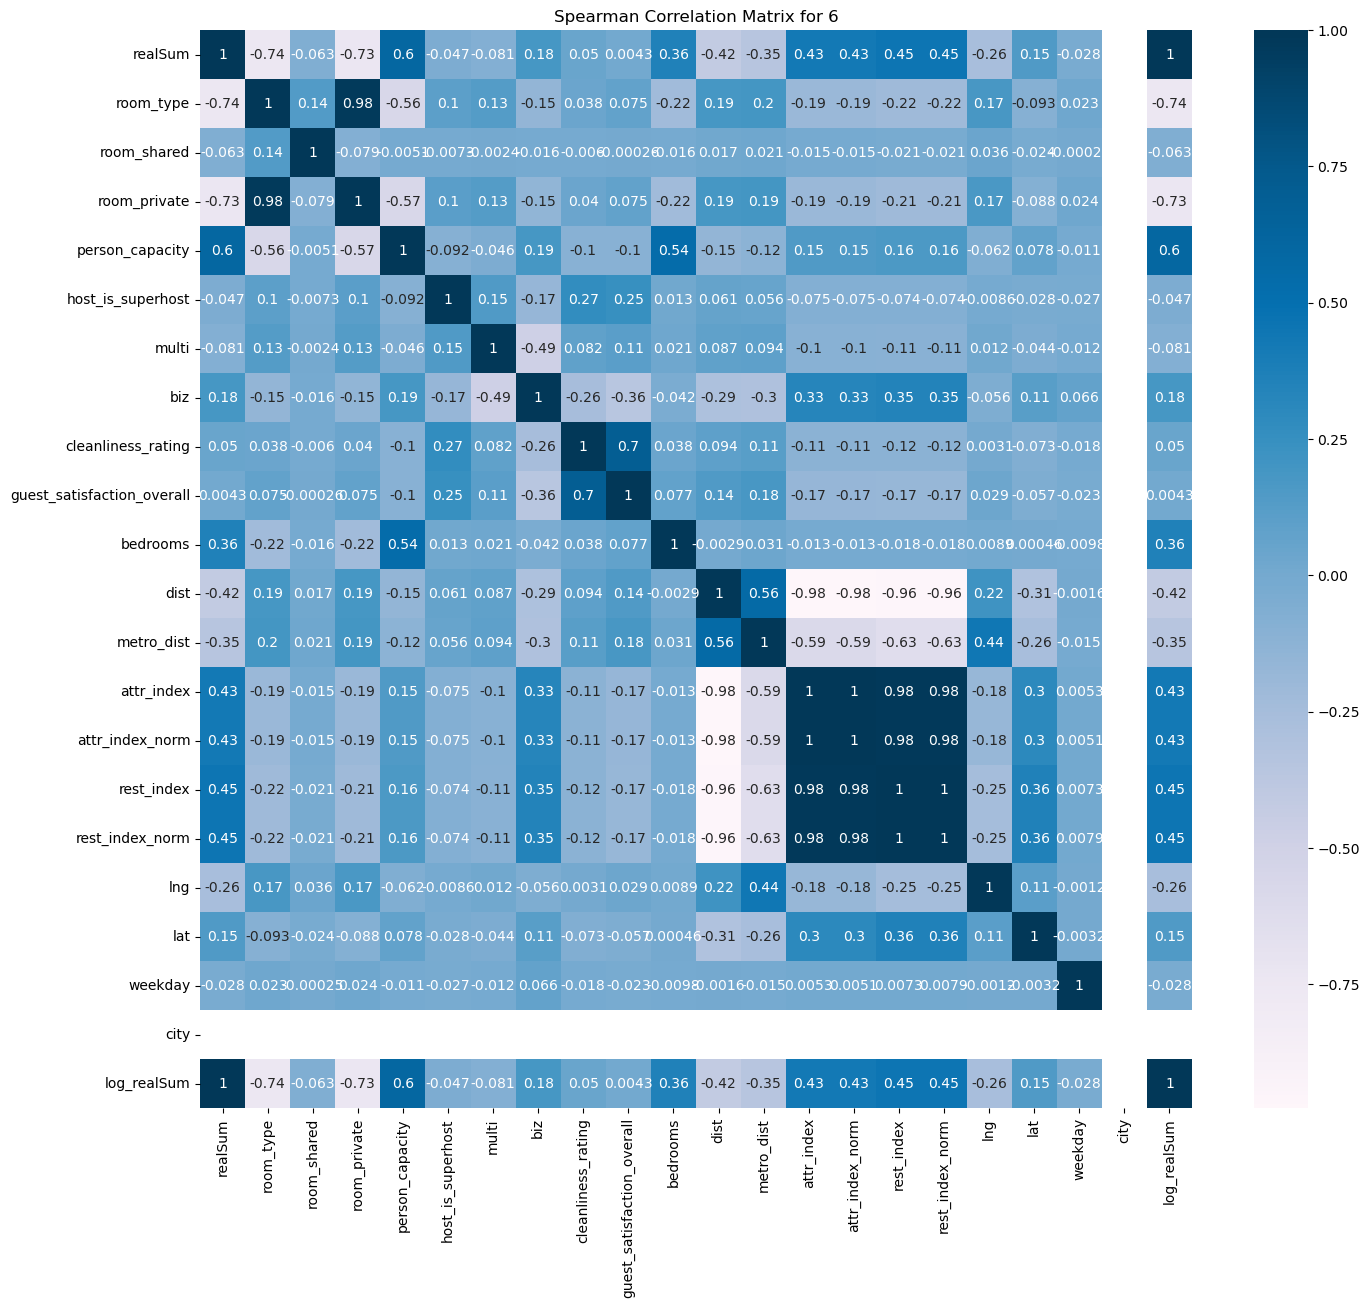

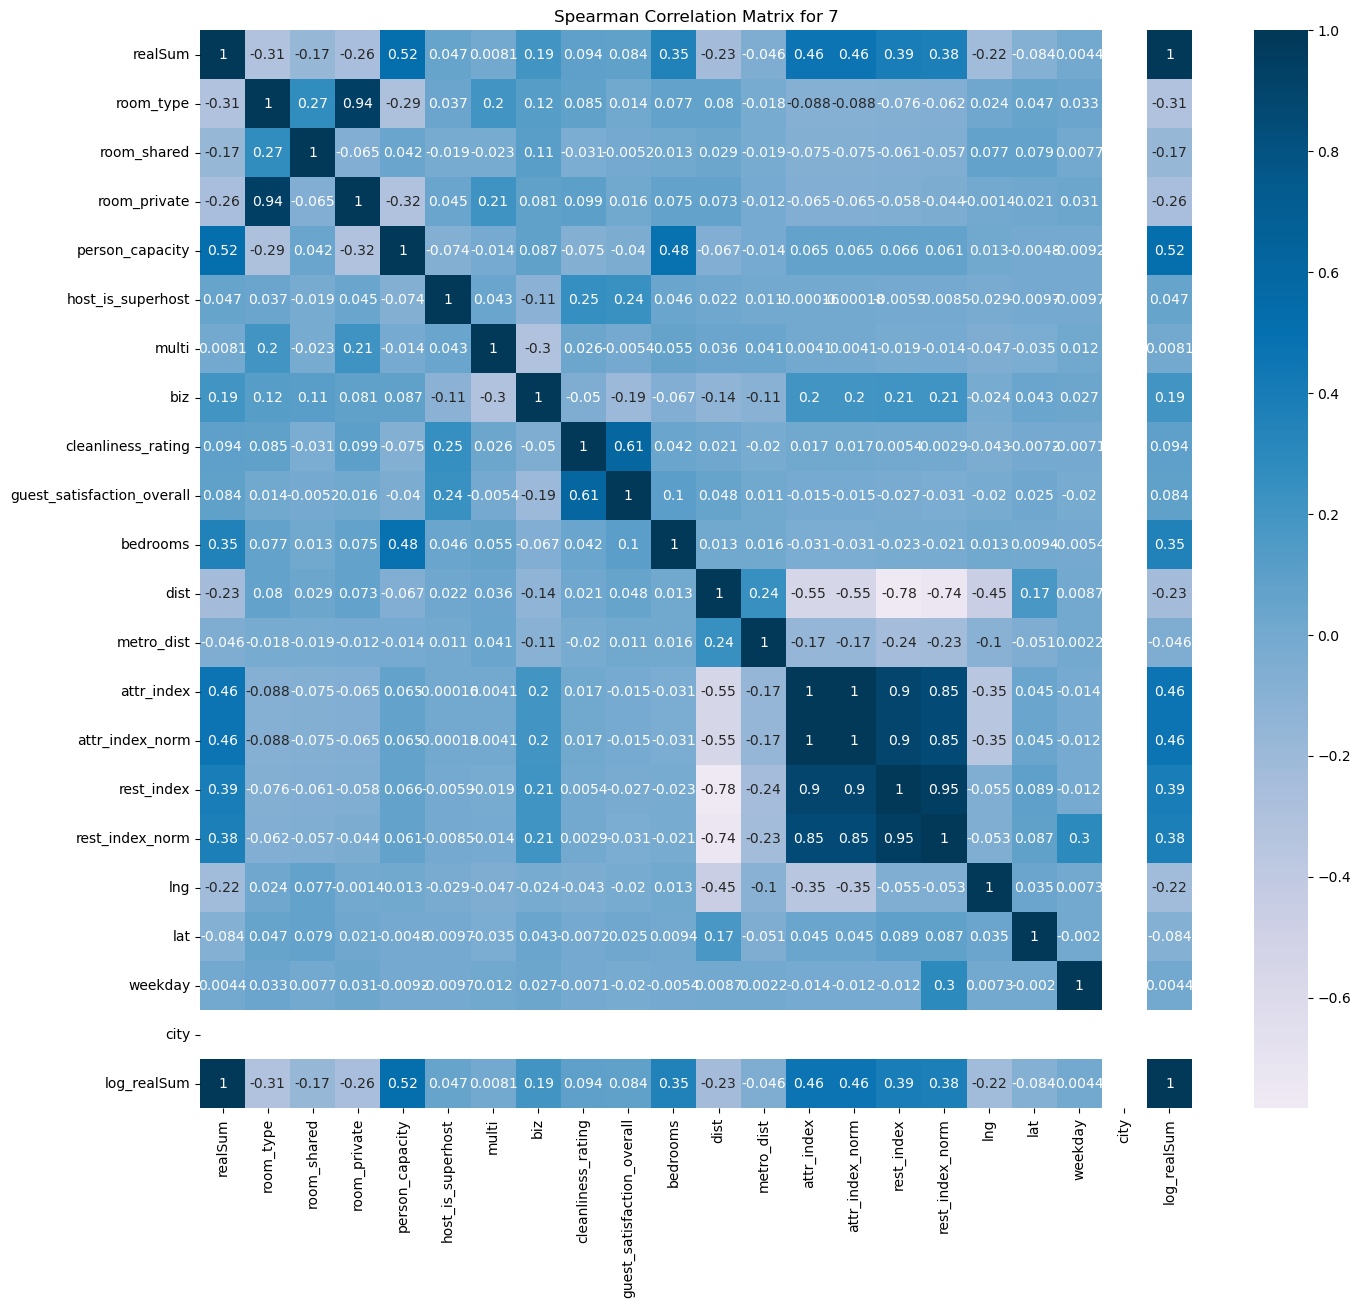

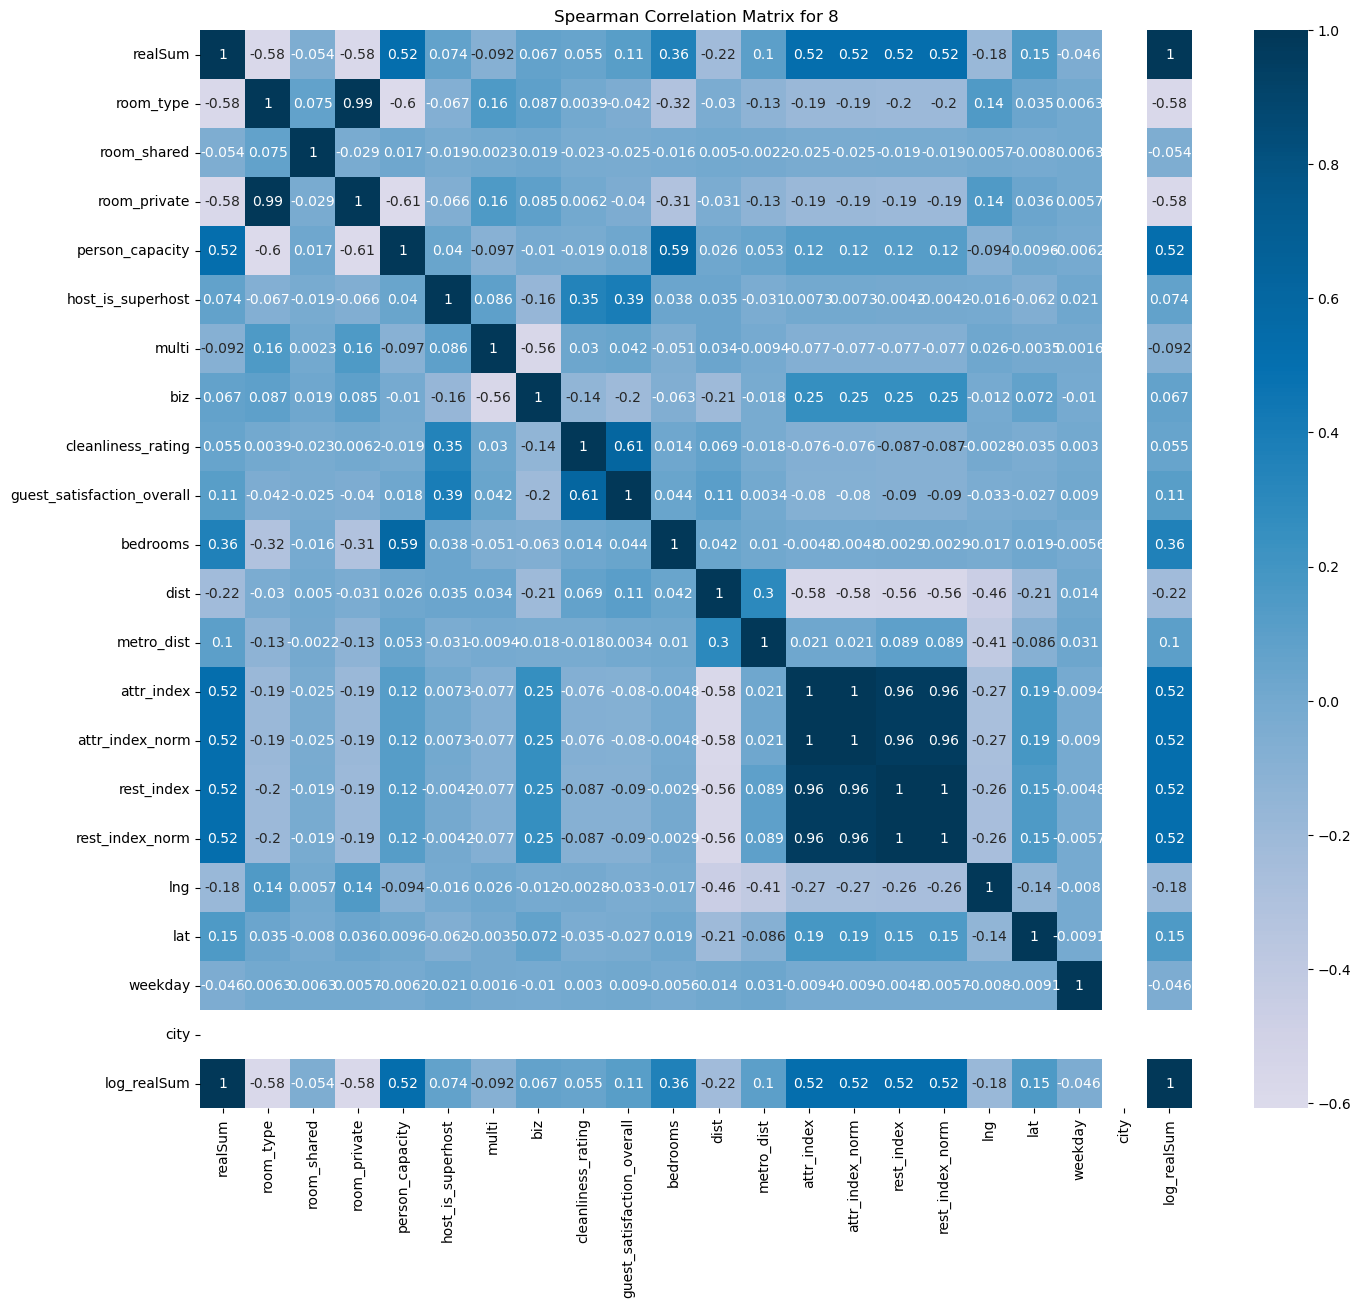

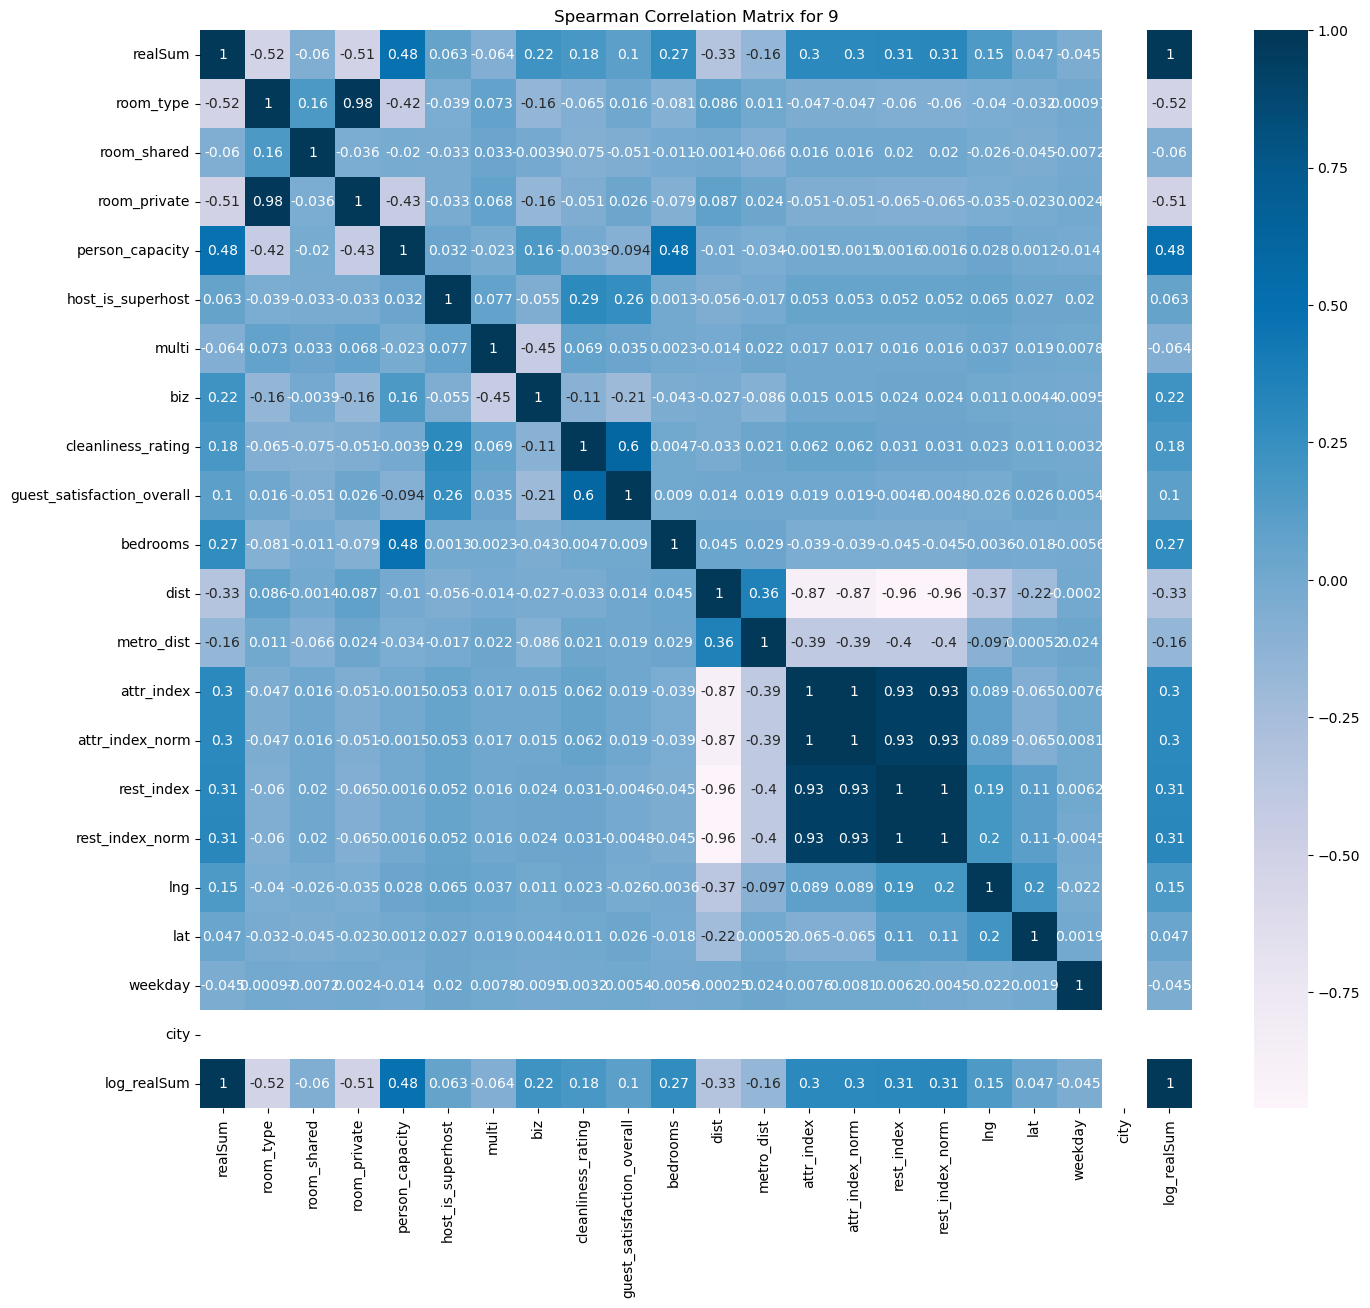

In [173]:

# Group by 'city' and loop through each group

for city, group in label_df.groupby('city'):
    # Calculate the Spearman correlation matrix for each city
    corrmat = group.corr(method="spearman")
    
    # Plot the heatmap for each city's correlation matrix
    plt.figure(figsize=(16, 14))
    cmap = plt.get_cmap('PuBu')
    
    # Plot heatmap
    sns.heatmap(corrmat, annot=True, center=0, cmap=cmap, cbar=True)
    plt.title(f"Spearman Correlation Matrix for {city}")
    plt.show()

## Notes
- person_capacity, room_type & bedrooms 
- attr_index_norm & (rest_index_norm)> metro_dist 
- city vs dist 



## Decisions
- 1. Use person_capacity as main an indicator of capacity
- 2. User room_type as an accommodation type 
- 3. Create neighbour_attr = mean(attr_index + rest_index) & normalized one
- 4. 

## Feature engineering 
It is based on the diffences observed through cities 
- Accommodation details: room_type & person_capacity
- Experience group: host_is_superhost & overall_rating 
- Location details: dist, metro_dist, neighbourhood index (average of attraction norm and rest norm)

In [174]:
# Step 1: Calculate the mean of 'attr_index' and 'rest_index'
label_df['neig_index_mean'] = label_df[['attr_index', 'rest_index']].mean(axis=1)

# Step 2: Normalize the mean values using MinMaxScaler
scaler = MinMaxScaler()
label_df['neig_index_norm'] = scaler.fit_transform(label_df[['neig_index_mean']])



In [175]:
label_df["neig_index_norm"] = label_df["neig_index_norm"] * 100

In [176]:

# Display the updated DataFrame
label_df["neig_index_norm"].describe()

count    51677.000000
mean        12.769350
std         10.070793
min          0.000000
25%          5.216835
50%         10.557311
75%         17.079546
max        100.000000
Name: neig_index_norm, dtype: float64

# Modeling

In [177]:
model_df = main_df[["log_realSum", "room_type", "person_capacity", 
                     "host_is_superhost", "guest_satisfaction_overall", 
                     "dist", "metro_dist", "neig_index_norm", "city"]]

In [178]:
# One-Hot Encoding
model_df = pd.get_dummies(model_df, columns=['room_type'], drop_first=True)

# Note
- room_type_1 : private room 
- room_type_2: shared room
- other : entire apt 

# Introduction to modeling 
We will do regression to predict price and understand the effect of variables over price 

# Linear Regressor

In [192]:
model_df = label_df[["city", "room_type", "person_capacity", "host_is_superhost", "guest_satisfaction_overall", 
                     "dist", "metro_dist", "neig_index_norm", "log_realSum"]]

In [193]:

# Create empty lists to store results for each city
coefficients_list = []
r_squared_list = []
mse_list = []
mae_list = []
rmse_list = []  # List to store RMSE values
p_values_list = []  # List to store p-values for coefficients

# Define the list of numerical columns that need to be scaled
numerical_cols = ['person_capacity', 'dist', 'metro_dist', 'neig_index_norm']

cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Loop through each unique city and run regression
for city in model_df['city'].unique():
    # Filter data for the current city
    city_data = model_df[model_df['city'] == city]

    # Drop 'city' column and any rows with missing values
    city_data_clean = city_data.drop(columns=["city", "guest_satisfaction_overall"]).dropna()

    # Define the dependent variable (target) and independent variables (predictors)
    y = city_data_clean["log_realSum"]  
    X = city_data_clean.drop(columns=["log_realSum"])  # All other columns as predictors

    # One-hot encode categorical columns
    X = pd.get_dummies(X, columns=["room_type", "host_is_superhost"], drop_first=True)

    # Scale the numerical variables
    scaler = StandardScaler()
    X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

    # Add a constant to the independent variables (for the intercept)
    X = sm.add_constant(X)

    # Initialize the model from statsmodels for detailed coefficient and p-value analysis
    ols_model = sm.OLS(y, X)

    # Fit the model
    ols_result = ols_model.fit()

    # Extract coefficients and p-values
    coefficients = ols_result.params
    p_values = ols_result.pvalues

    # Store the results for coefficients and p-values
    for coef_name, coef_value, p_value in zip(coefficients.index, coefficients, p_values):
        coefficients_list.append({
            "city": city,
            "coefficient_name": coef_name,
            "coefficient_value": coef_value,
            "p_value": f"{p_value:.6f}"  # Format p-value as normal number
        })

    # Perform cross-validation for R-squared
    cv_r_squared = cross_val_score(LinearRegression(), X, y, cv=cv, scoring='r2')
    mean_r_squared = cv_r_squared.mean()

    # Perform cross-validation for MSE
    cv_mse = cross_val_score(LinearRegression(), X, y, cv=KFold(n_splits=5, shuffle=True, random_state=42), scoring='neg_mean_squared_error')
    mean_mse = -cv_mse.mean()  # Negative because scoring returns negative MSE

    # Calculate RMSE (Root Mean Squared Error)
    rmse = np.sqrt(mean_mse)

    # Perform cross-validation for MAE
    cv_mae = cross_val_score(LinearRegression(), X, y, cv=KFold(n_splits=5, shuffle=True, random_state=42), scoring='neg_mean_absolute_error')
    mean_mae = -cv_mae.mean()  # Negative because scoring returns negative MAE

    # Store the performance metrics for the current city
    r_squared_list.append({
        "city": city,
        "mean_R_squared": mean_r_squared
    })
    mse_list.append({
        "city": city,
        "mean_MSE": mean_mse
    })
    rmse_list.append({
        "city": city,
        "mean_RMSE": rmse
    })
    mae_list.append({
        "city": city,
        "mean_MAE": mean_mae
    })

# Convert the lists into DataFrames
coefficients_df = pd.DataFrame(coefficients_list)
r_squared_df = pd.DataFrame(r_squared_list)
mse_df = pd.DataFrame(mse_list)
rmse_df = pd.DataFrame(rmse_list)
mae_df = pd.DataFrame(mae_list)

# Display the results
print("Coefficients and P-values Table:\n", coefficients_df)
print("\nMean R-squared from Cross-Validation:\n", r_squared_df)
print("\nMean MSE from Cross-Validation:\n", mse_df)
print("\nMean RMSE from Cross-Validation:\n", rmse_df)
print("\nMean MAE from Cross-Validation:\n", mae_df)


Coefficients and P-values Table:
     city     coefficient_name  coefficient_value   p_value
0      6                const           5.969779  0.000000
1      6      person_capacity           0.196477  0.000000
2      6                 dist          -0.048685  0.000000
3      6           metro_dist          -0.055072  0.000000
4      6      neig_index_norm           0.124852  0.000000
5      6          room_type_1          -0.613769  0.000000
6      6          room_type_2          -0.782168  0.000000
7      6  host_is_superhost_1           0.085455  0.000000
8      2                const           5.967842  0.000000
9      2      person_capacity           0.179607  0.000000
10     2                 dist          -0.108364  0.000000
11     2           metro_dist           0.022066  0.003411
12     2      neig_index_norm           0.023543  0.046705
13     2          room_type_1          -0.641713  0.000000
14     2          room_type_2          -1.077457  0.000000
15     2  host_is_supe

# Decision Tree Regressor

In [ ]:

# Create empty lists to store results for each city
coefficients_list = []
r_squared_list = []
mse_list = []
rmse_list = []
mae_list = []

# Define cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Loop through each unique city and run regression using DecisionTreeRegressor with cross-validation
for city in model_df['city'].unique():
    # Filter data for the current city
    city_data = model_df[model_df['city'] == city]

    # Drop 'city' column and any rows with missing values
    city_data_clean = city_data.drop(columns=["city"]).dropna()

    # Define the dependent variable (target) and independent variables (predictors)
    y = city_data_clean["log_realSum"]  
    X = city_data_clean.drop(columns=["log_realSum"])  # All other columns as predictors

    # One-hot encode 'room_type'
    X = pd.get_dummies(X, columns=['room_type'], drop_first=True)

    # Label encode 'host_is_superhost' (True/False -> 1/0)
    label_encoder = LabelEncoder()
    X['host_is_superhost'] = label_encoder.fit_transform(X['host_is_superhost'])

    # Initialize the DecisionTreeRegressor model
    model = DecisionTreeRegressor()

    # Perform cross-validation for R-squared
    r_squared_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

    # Calculate the mean and std of R-squared values
    mean_r_squared = np.mean(r_squared_scores)
    std_r_squared = np.std(r_squared_scores)

    # Store R-squared (mean and std) for the current city
    r_squared_list.append({
        "city": city,
        "mean_R_squared": mean_r_squared,
        "std_R_squared": std_r_squared
    })

    # Perform cross-validation for MSE
    mse_scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')

    # Convert MSE from negative to positive (as cross_val_score returns negative MSE)
    mse_scores = -mse_scores

    # Calculate the mean MSE
    mean_mse = np.mean(mse_scores)

    # Store MSE for the current city
    mse_list.append({
        "city": city,
        "mean_MSE": mean_mse
    })

    # Calculate RMSE (Root Mean Squared Error)
    rmse_scores = np.sqrt(mse_scores)
    mean_rmse = np.mean(rmse_scores)

    # Store RMSE for the current city
    rmse_list.append({
        "city": city,
        "mean_RMSE": mean_rmse
    })

    # Perform cross-validation for MAE
    mae_scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_absolute_error')

    # Convert MAE from negative to positive (as cross_val_score returns negative MAE)
    mae_scores = -mae_scores

    # Calculate the mean MAE
    mean_mae = np.mean(mae_scores)

    # Store MAE for the current city
    mae_list.append({
        "city": city,
        "mean_MAE": mean_mae
    })

    # Fit the model to get feature importances (coefficients in Decision Trees)
    model.fit(X, y)

    # Store feature importances (coefficients in Decision Trees)
    feature_importances = model.feature_importances_

    # Store the results for coefficients (feature importances)
    for coef_name, coef_value in zip(X.columns, feature_importances):
        coefficients_list.append({
            "city": city,
            "coefficient_name": coef_name,
            "coefficient_value": coef_value,
            "p_value": None  # Decision trees don't provide p-values
        })

# Convert the lists into DataFrames
dt_coefficients_df = pd.DataFrame(coefficients_list)
dt_r_squared_df = pd.DataFrame(r_squared_list)
dt_mse_df = pd.DataFrame(mse_list)
dt_rmse_df = pd.DataFrame(rmse_list)
dt_mae_df = pd.DataFrame(mae_list)

# Display the results
print("Feature Importances (Coefficients) Table:\n", dt_coefficients_df)
print("\nR-squared Table:\n", dt_r_squared_df)
print("\nMSE Table:\n", dt_mse_df)
print("\nRMSE Table:\n", dt_rmse_df)
print("\nMAE Table:\n", dt_mae_df)


Feature Importances (Coefficients) Table:
     city            coefficient_name  coefficient_value p_value
0      6             person_capacity           0.077654    None
1      6           host_is_superhost           0.005965    None
2      6  guest_satisfaction_overall           0.055337    None
3      6                        dist           0.084789    None
4      6                  metro_dist           0.103100    None
5      6             neig_index_norm           0.190388    None
6      6                 room_type_1           0.475857    None
7      6                 room_type_2           0.006910    None
8      2             person_capacity           0.057791    None
9      2           host_is_superhost           0.007838    None
10     2  guest_satisfaction_overall           0.071094    None
11     2                        dist           0.150549    None
12     2                  metro_dist           0.097561    None
13     2             neig_index_norm           0.124487    No

# Random forest regressor 

In [195]:

# Create empty lists to store results for each city
coefficients_list = []
r_squared_list = []
mse_list = []
rmse_list = []
mae_list = []

# Define cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Loop through each unique city and run regression using RandomForestRegressor with cross-validation
for city in model_df['city'].unique():
    # Filter data for the current city
    city_data = model_df[model_df['city'] == city]

    # Drop 'city' column and any rows with missing values
    city_data_clean = city_data.drop(columns=["city"]).dropna()

    # Define the dependent variable (target) and independent variables (predictors)
    y = city_data_clean["log_realSum"] 
    X = city_data_clean.drop(columns=["log_realSum"])  # All other columns as predictors

    # One-hot encode 'room_type'
    X = pd.get_dummies(X, columns=['room_type'], drop_first=True)

    # Label encode 'host_is_superhost' (True/False -> 1/0)
    label_encoder = LabelEncoder()
    X['host_is_superhost'] = label_encoder.fit_transform(X['host_is_superhost'])

    # Initialize the RandomForestRegressor model
    model = RandomForestRegressor(random_state=42)

    # Perform cross-validation for R-squared
    r_squared_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

    # Calculate the mean and std of R-squared values
    mean_r_squared = np.mean(r_squared_scores)
    std_r_squared = np.std(r_squared_scores)

    # Store R-squared (mean and std) for the current city
    r_squared_list.append({
        "city": city,
        "mean_R_squared": mean_r_squared,
        "std_R_squared": std_r_squared
    })

    # Perform cross-validation for MSE
    mse_scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')

    # Convert MSE from negative to positive (as cross_val_score returns negative MSE)
    mse_scores = -mse_scores

    # Calculate the mean MSE
    mean_mse = np.mean(mse_scores)

    # Store MSE for the current city
    mse_list.append({
        "city": city,
        "mean_MSE": mean_mse
    })

    # Calculate RMSE (Root Mean Squared Error)
    rmse_scores = np.sqrt(mse_scores)
    mean_rmse = np.mean(rmse_scores)

    # Store RMSE for the current city
    rmse_list.append({
        "city": city,
        "mean_RMSE": mean_rmse
    })

    # Perform cross-validation for MAE
    mae_scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_absolute_error')

    # Convert MAE from negative to positive (as cross_val_score returns negative MAE)
    mae_scores = -mae_scores

    # Calculate the mean MAE
    mean_mae = np.mean(mae_scores)

    # Store MAE for the current city
    mae_list.append({
        "city": city,
        "mean_MAE": mean_mae
    })

    # Fit the model to get feature importances (coefficients in Random Forest)
    model.fit(X, y)

    # Store feature importances (coefficients in Random Forest)
    feature_importances = model.feature_importances_

    # Store the results for coefficients (feature importances)
    for coef_name, coef_value in zip(X.columns, feature_importances):
        coefficients_list.append({
            "city": city,
            "coefficient_name": coef_name,
            "coefficient_value": coef_value,
            "p_value": None  # Random Forest doesn't provide p-values
        })

# Convert the lists into DataFrames
rf_coefficients_df = pd.DataFrame(coefficients_list)
rf_r_squared_df = pd.DataFrame(r_squared_list)
rf_mse_df = pd.DataFrame(mse_list)
rf_rmse_df = pd.DataFrame(rmse_list)
rf_mae_df = pd.DataFrame(mae_list)

# Display the results
print("Feature Importances (Coefficients) Table:\n", rf_coefficients_df)
print("\nR-squared Table:\n", rf_r_squared_df)
print("\nMSE Table:\n", rf_mse_df)
print("\nRMSE Table:\n", rf_rmse_df)
print("\nMAE Table:\n", rf_mae_df)


Feature Importances (Coefficients) Table:
     city            coefficient_name  coefficient_value p_value
0      6             person_capacity           0.078333    None
1      6           host_is_superhost           0.006742    None
2      6  guest_satisfaction_overall           0.058725    None
3      6                        dist           0.096306    None
4      6                  metro_dist           0.099738    None
5      6             neig_index_norm           0.175374    None
6      6                 room_type_1           0.477401    None
7      6                 room_type_2           0.007380    None
8      2             person_capacity           0.061542    None
9      2           host_is_superhost           0.010120    None
10     2  guest_satisfaction_overall           0.070397    None
11     2                        dist           0.135051    None
12     2                  metro_dist           0.099891    None
13     2             neig_index_norm           0.131665    No

# KNeighborsRegressor

In [196]:


# Create empty lists to store results for each city
coefficients_list = []
r_squared_list = []
mse_list = []
rmse_list = []
mae_list = []

# Define cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Loop through each unique city and run regression using KNeighborsRegressor with cross-validation
for city in model_df['city'].unique():
    # Filter data for the current city
    city_data = model_df[model_df['city'] == city]

    # Drop 'city' and 'guest_satisfaction_overall' column and any rows with missing values
    city_data_clean = city_data.drop(columns=["city", "guest_satisfaction_overall"]).dropna()

    # Define the dependent variable (target) and independent variables (predictors)
    y = city_data_clean["log_realSum"] 
    X = city_data_clean.drop(columns=["log_realSum"])  # All other columns as predictors

    # One-hot encode 'room_type' (creating dummy variables for the 3 categories)
    X = pd.get_dummies(X, columns=['room_type'], drop_first=True)

    # Label encode 'host_is_superhost' (True/False to 1/0)
    label_encoder = LabelEncoder()
    X['host_is_superhost'] = label_encoder.fit_transform(X['host_is_superhost'])

    # Standardize numerical features
    scaler = StandardScaler()
    # Apply standardization to all numerical columns
    numerical_columns = X.select_dtypes(include=[np.number]).columns
    X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

    # Initialize the KNeighborsRegressor model
    model = KNeighborsRegressor()

    # Perform cross-validation for R-squared
    r_squared_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

    # Calculate the mean and std of R-squared values
    mean_r_squared = np.mean(r_squared_scores)
    std_r_squared = np.std(r_squared_scores)

    # Store R-squared (mean and std) for the current city
    r_squared_list.append({
        "city": city,
        "mean_R_squared": mean_r_squared,
        "std_R_squared": std_r_squared
    })

    # Perform cross-validation for MSE
    mse_scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')

    # Convert MSE from negative to positive (as cross_val_score returns negative MSE)
    mse_scores = -mse_scores

    # Calculate the mean MSE
    mean_mse = np.mean(mse_scores)

    # Store MSE for the current city
    mse_list.append({
        "city": city,
        "mean_MSE": mean_mse
    })

    # Calculate RMSE (Root Mean Squared Error)
    rmse_scores = np.sqrt(mse_scores)
    mean_rmse = np.mean(rmse_scores)

    # Store RMSE for the current city
    rmse_list.append({
        "city": city,
        "mean_RMSE": mean_rmse
    })

    # Perform cross-validation for MAE
    mae_scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_absolute_error')

    # Convert MAE from negative to positive (as cross_val_score returns negative MAE)
    mae_scores = -mae_scores

    # Calculate the mean MAE
    mean_mae = np.mean(mae_scores)

    # Store MAE for the current city
    mae_list.append({
        "city": city,
        "mean_MAE": mean_mae
    })

    # Fit the model to get the best number of neighbors
    model.fit(X, y)

    # Store model configuration (number of neighbors used)
    coefficients_list.append({
        "city": city,
        "coefficient_name": "n_neighbors",
        "coefficient_value": model.n_neighbors,
        "p_value": None  # KNeighborsRegressor does not provide p-values
    })

# Convert the lists into DataFrames
kn_coefficients_df = pd.DataFrame(coefficients_list)
kn_r_squared_df = pd.DataFrame(r_squared_list)
kn_mse_df = pd.DataFrame(mse_list)
kn_rmse_df = pd.DataFrame(rmse_list)
kn_mae_df = pd.DataFrame(mae_list)

# Display the results
print("Model Configuration (Coefficients Table):\n", kn_coefficients_df)
print("\nR-squared Table:\n", kn_r_squared_df)
print("\nMSE Table:\n", kn_mse_df)
print("\nRMSE Table:\n", kn_rmse_df)
print("\nMAE Table:\n", kn_mae_df)


Model Configuration (Coefficients Table):
    city coefficient_name  coefficient_value p_value
0     6      n_neighbors                  5    None
1     2      n_neighbors                  5    None
2     3      n_neighbors                  5    None
3     0      n_neighbors                  5    None
4     1      n_neighbors                  5    None
5     4      n_neighbors                  5    None
6     5      n_neighbors                  5    None
7     7      n_neighbors                  5    None
8     8      n_neighbors                  5    None
9     9      n_neighbors                  5    None

R-squared Table:
    city  mean_R_squared  std_R_squared
0     6        0.681774       0.011490
1     2        0.609246       0.036512
2     3        0.524325       0.027664
3     0        0.651574       0.017832
4     1        0.497708       0.022675
5     4        0.292289       0.037631
6     5        0.650795       0.008995
7     7        0.547591       0.028160
8     8        

# XGBRegressor

In [197]:


# Create empty lists to store results for each city
coefficients_list = []
r_squared_list = []
mse_list = []
rmse_list = []
mae_list = []

# Define cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Loop through each unique city and run regression using XGBRegressor with cross-validation
for city in model_df['city'].unique():
    # Filter data for the current city
    city_data = model_df[model_df['city'] == city]

    # Drop 'city' column and any rows with missing values
    city_data_clean = city_data.drop(columns=["city"]).dropna()

    # Define the dependent variable (target) and independent variables (predictors)
    y = city_data_clean["log_realSum"]  
    X = city_data_clean.drop(columns=["log_realSum"])  # All other columns as predictors

    # Label encoding for 'room_type'
    label_encoder_room_type = LabelEncoder()
    X['room_type'] = label_encoder_room_type.fit_transform(X['room_type'])

    # Label encoding for 'host_is_superhost'
    label_encoder_superhost = LabelEncoder()
    X['host_is_superhost'] = label_encoder_superhost.fit_transform(X['host_is_superhost'])

    # Initialize the XGBRegressor model
    model = XGBRegressor()

    # Perform cross-validation for R-squared
    r_squared_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

    # Calculate the mean and std of R-squared values
    mean_r_squared = np.mean(r_squared_scores)
    std_r_squared = np.std(r_squared_scores)

    # Store R-squared (mean and std) for the current city
    r_squared_list.append({
        "city": city,
        "mean_R_squared": mean_r_squared,
        "std_R_squared": std_r_squared
    })

    # Perform cross-validation for MSE
    mse_scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')

    # Convert MSE from negative to positive (as cross_val_score returns negative MSE)
    mse_scores = -mse_scores

    # Calculate the mean MSE
    mean_mse = np.mean(mse_scores)

    # Store MSE for the current city
    mse_list.append({
        "city": city,
        "mean_MSE": mean_mse
    })

    # Calculate RMSE (Root Mean Squared Error)
    rmse_scores = np.sqrt(mse_scores)
    mean_rmse = np.mean(rmse_scores)

    # Store RMSE for the current city
    rmse_list.append({
        "city": city,
        "mean_RMSE": mean_rmse
    })

    # Perform cross-validation for MAE
    mae_scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_absolute_error')

    # Convert MAE from negative to positive (as cross_val_score returns negative MAE)
    mae_scores = -mae_scores

    # Calculate the mean MAE
    mean_mae = np.mean(mae_scores)

    # Store MAE for the current city
    mae_list.append({
        "city": city,
        "mean_MAE": mean_mae
    })

    # Fit the model to get feature importances (coefficients in Decision Trees)
    model.fit(X, y)

    # XGBRegressor provides feature importances
    feature_importances = model.feature_importances_

    # Store the results for coefficients (feature importances)
    for coef_name, coef_value in zip(X.columns, feature_importances):
        coefficients_list.append({
            "city": city,
            "coefficient_name": coef_name,
            "coefficient_value": coef_value,
            "p_value": None  # XGBoost does not provide p-values
        })

# Convert the lists into DataFrames
xg_coefficients_df = pd.DataFrame(coefficients_list)
xg_r_squared_df = pd.DataFrame(r_squared_list)
xg_mse_df = pd.DataFrame(mse_list)
xg_rmse_df = pd.DataFrame(rmse_list)
xg_mae_df = pd.DataFrame(mae_list)

# Display the results
print("Feature Importances (Coefficients) Table:\n", xg_coefficients_df)
print("\nR-squared Table:\n", xg_r_squared_df)
print("\nMSE Table:\n", xg_mse_df)
print("\nRMSE Table:\n", xg_rmse_df)
print("\nMAE Table:\n", xg_mae_df)


Feature Importances (Coefficients) Table:
     city            coefficient_name  coefficient_value p_value
0      6                   room_type           0.788718    None
1      6             person_capacity           0.078269    None
2      6           host_is_superhost           0.013224    None
3      6  guest_satisfaction_overall           0.023799    None
4      6                        dist           0.022867    None
5      6                  metro_dist           0.022901    None
6      6             neig_index_norm           0.050223    None
7      2                   room_type           0.802708    None
8      2             person_capacity           0.058895    None
9      2           host_is_superhost           0.021723    None
10     2  guest_satisfaction_overall           0.024771    None
11     2                        dist           0.033492    None
12     2                  metro_dist           0.021631    None
13     2             neig_index_norm           0.036779    No

# Support Vector regression

In [200]:


# Create empty lists to store results for each city
coefficients_list = []
r_squared_list = []
mse_list = []
rmse_list = []
mae_list = []

# Define cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Loop through each unique city and run regression using SVR with cross-validation
for city in model_df['city'].unique():
    # Filter data for the current city
    city_data = model_df[model_df['city'] == city]

    # Drop 'city' column, 'guest_overall_satisfaction' and any rows with missing values
    city_data_clean = city_data.drop(columns=["city", "guest_satisfaction_overall"]).dropna()

    # Define the dependent variable (target) and independent variables (predictors)
    y = city_data_clean["log_realSum"]  
    X = city_data_clean.drop(columns=["log_realSum"])  # All other columns as predictors

    # Label encoding for 'room_type'
    label_encoder_room_type = LabelEncoder()
    X['room_type'] = label_encoder_room_type.fit_transform(X['room_type'])

    # Label encoding for 'host_is_superhost'
    label_encoder_superhost = LabelEncoder()
    X['host_is_superhost'] = label_encoder_superhost.fit_transform(X['host_is_superhost'])

    # Standardize the features (except the target variable)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Initialize the SVR model
    model = SVR()

    # Perform cross-validation for R-squared
    r_squared_scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='r2')

    # Calculate the mean and std of R-squared values
    mean_r_squared = np.mean(r_squared_scores)
    std_r_squared = np.std(r_squared_scores)

    # Store R-squared (mean and std) for the current city
    r_squared_list.append({
        "city": city,
        "mean_R_squared": mean_r_squared,
        "std_R_squared": std_r_squared
    })

    # Perform cross-validation for MSE
    mse_scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='neg_mean_squared_error')

    # Convert MSE from negative to positive (as cross_val_score returns negative MSE)
    mse_scores = -mse_scores

    # Calculate the mean MSE
    mean_mse = np.mean(mse_scores)

    # Store MSE for the current city
    mse_list.append({
        "city": city,
        "mean_MSE": mean_mse
    })

    # Calculate RMSE (Root Mean Squared Error)
    rmse_scores = np.sqrt(mse_scores)
    mean_rmse = np.mean(rmse_scores)

    # Store RMSE for the current city
    rmse_list.append({
        "city": city,
        "mean_RMSE": mean_rmse
    })

    # Perform cross-validation for MAE
    mae_scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='neg_mean_absolute_error')

    # Convert MAE from negative to positive (as cross_val_score returns negative MAE)
    mae_scores = -mae_scores

    # Calculate the mean MAE
    mean_mae = np.mean(mae_scores)

    # Store MAE for the current city
    mae_list.append({
        "city": city,
        "mean_MAE": mean_mae
    })

    # Fit the model to get coefficients (feature importances in SVR)
    model.fit(X_scaled, y)

    # SVR provides coefficients (model's support vectors)
    coefficients = model.coef_ if hasattr(model, 'coef_') else None

    # Store the results for coefficients (SVR doesn't provide p-values)
    if coefficients is not None:
        for coef_name, coef_value in zip(X.columns, coefficients.flatten()):
            coefficients_list.append({
                "city": city,
                "coefficient_name": coef_name,
                "coefficient_value": coef_value,
                "p_value": None  # SVR does not provide p-values
            })

# Convert the lists into DataFrames
sv_coefficients_df = pd.DataFrame(coefficients_list)
sv_r_squared_df = pd.DataFrame(r_squared_list)
sv_mse_df = pd.DataFrame(mse_list)
sv_rmse_df = pd.DataFrame(rmse_list)
sv_mae_df = pd.DataFrame(mae_list)

# Display the results
print("Feature Importances (Coefficients) Table:\n", sv_coefficients_df)
print("\nR-squared Table:\n", sv_r_squared_df)
print("\nMSE Table:\n", sv_mse_df)
print("\nRMSE Table:\n", sv_rmse_df)
print("\nMAE Table:\n", sv_mae_df)


Feature Importances (Coefficients) Table:
 Empty DataFrame
Columns: []
Index: []

R-squared Table:
    city  mean_R_squared  std_R_squared
0     6        0.654631       0.012820
1     2        0.588648       0.045840
2     3        0.537976       0.022363
3     0        0.665084       0.017660
4     1        0.473738       0.022729
5     4        0.302924       0.045837
6     5        0.642713       0.004484
7     7        0.535602       0.039694
8     8        0.586050       0.017716
9     9        0.473276       0.017320

MSE Table:
    city  mean_MSE
0     6  0.143294
1     2  0.127070
2     3  0.113746
3     0  0.091927
4     1  0.100698
5     4  0.119270
6     5  0.066436
7     7  0.118265
8     8  0.077046
9     9  0.085806

RMSE Table:
    city  mean_RMSE
0     6   0.378300
1     2   0.356198
2     3   0.337136
3     0   0.302850
4     1   0.317270
5     4   0.345094
6     5   0.257675
7     7   0.343795
8     8   0.277471
9     9   0.292836

MAE Table:
    city  mean_MAE
0     

In [201]:
print(rf_r_squared_df)

   city  mean_R_squared  std_R_squared
0     6        0.826617       0.011396
1     2        0.740635       0.038904
2     3        0.752896       0.023071
3     0        0.771179       0.022969
4     1        0.724904       0.036803
5     4        0.542019       0.036352
6     5        0.804969       0.015261
7     7        0.760547       0.022974
8     8        0.776114       0.030046
9     9        0.737845       0.009350


In [202]:
# Prepare comparison dfs

r_squared_df["model"] = "linear_regression"
mae_df["model"] = "linear_regression"
mse_df["model"] = "linear_regression"
rmse_df["model"] = "linear_regression"

dt_r_squared_df["model"] = "decision_tree_regression"
dt_mae_df["model"] = "decision_tree_regression"
dt_mse_df["model"] = "decision_tree_regression"
dt_rmse_df["model"] = "decision_tree_regression"

rf_r_squared_df["model"] = "random_forest_regression"
rf_mae_df["model"] = "random_forest_regression"
rf_mse_df["model"] = "random_forest_regression"
rf_rmse_df["model"] = "random_forest_regression"

kn_r_squared_df["model"] = "k_neighbours_regression"
kn_mae_df["model"] = "k_neighbours_regression"
kn_mse_df["model"] = "k_neighbours_regression"
kn_rmse_df["model"] = "k_neighbours_regression"

xg_r_squared_df["model"] = "xg_boost_regression"
xg_mae_df["model"] = "xg_boost_regression"
xg_mse_df["model"] = "xg_boost_regression"
xg_rmse_df["model"] = "xg_boost_regression"

sv_r_squared_df["model"] = "support_vector_regression"
sv_mae_df["model"] = "support_vector_regression"
sv_mse_df["model"] = "support_vector_regression"
sv_rmse_df["model"] = "support_vector_regression"

# combine r_squared
all_models_r_squared_df = pd.concat([
    r_squared_df,
    kn_r_squared_df,
    dt_r_squared_df,
    rf_r_squared_df,
    xg_r_squared_df,
    sv_r_squared_df
])

# Sort the combined DataFrame by 'model' and 'city'
all_models_r_squared_df = all_models_r_squared_df.sort_values(by=['model', 'city'])

# Combine mae
all_models_mae_df = pd.concat([
    mae_df,
    kn_mae_df,
    dt_mae_df,
    rf_mae_df,
    xg_mae_df,
    sv_mae_df
])

# Sort the combined DataFrame by 'model' and 'city'
all_models_mae_df = all_models_mae_df.sort_values(by=['model', 'city'])

# Combine mse
all_models_mse_df = pd.concat([
    mse_df,
    kn_mse_df,
    dt_mse_df,
    rf_mse_df,
    xg_mse_df,
    sv_mse_df
])

# Sort the combined DataFrame by 'model' and 'city'
all_models_mse_df = all_models_mse_df.sort_values(by=['model', 'city'])

# Combine rmse
all_models_rmse_df = pd.concat([
    rmse_df,
    kn_rmse_df,
    dt_rmse_df,
    rf_rmse_df,
    xg_rmse_df,
    sv_rmse_df
])

# Sort the combined DataFrame by 'model' and 'city'
all_models_rmse_df = all_models_rmse_df.sort_values(by=['model', 'city'])




In [203]:
# Calculate the mean R-squared for each model
model_performance_r_squared = all_models_r_squared_df.groupby('model')['mean_R_squared'].mean().reset_index()

# Sort the models by their mean R-squared, in descending order
model_performance_r_squared = model_performance_r_squared.sort_values(by='mean_R_squared', ascending=False)



In [204]:
# Calculate the mean mae for each model
model_performance_mae = all_models_mae_df.groupby('model')['mean_MAE'].mean().reset_index()

# Sort the models by their mean R-squared, in descending order
model_performance_mae = model_performance_mae.sort_values(by='mean_MAE', ascending=False)

In [205]:
# Calculate the mean mse for each model
model_performance_mse = all_models_mse_df.groupby('model')['mean_MSE'].mean().reset_index()

# Sort the models by their mean R-squared, in descending order
model_performance_mse = model_performance_mse.sort_values(by='mean_MSE', ascending=False)

In [206]:
# Calculate the mean rmse for each model
model_performance_rmse = all_models_rmse_df.groupby('model')['mean_RMSE'].mean().reset_index()

# Sort the models by their mean R-squared, in descending order
model_performance_rmse = model_performance_rmse.sort_values(by='mean_RMSE', ascending=False)

In [207]:
all_models_performance = pd.concat([
    model_performance_r_squared,
    model_performance_mae,
    model_performance_mse,
    model_performance_rmse
])

/var/folders/jc/0hd8z2gn2xn0l9ks8yxp3jxw0000gn/T/ipykernel_7499/1128362333.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coef_df['city'] = coef_df['city'].apply(lambda x: str(x))  # Ensure cities are strings


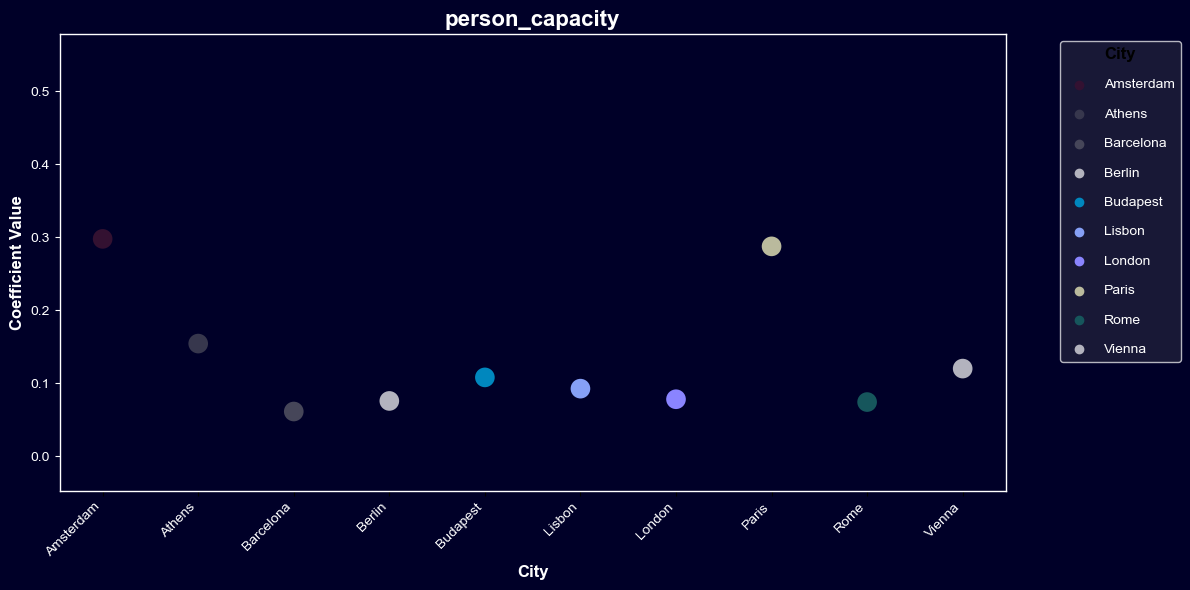

/var/folders/jc/0hd8z2gn2xn0l9ks8yxp3jxw0000gn/T/ipykernel_7499/1128362333.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coef_df['city'] = coef_df['city'].apply(lambda x: str(x))  # Ensure cities are strings


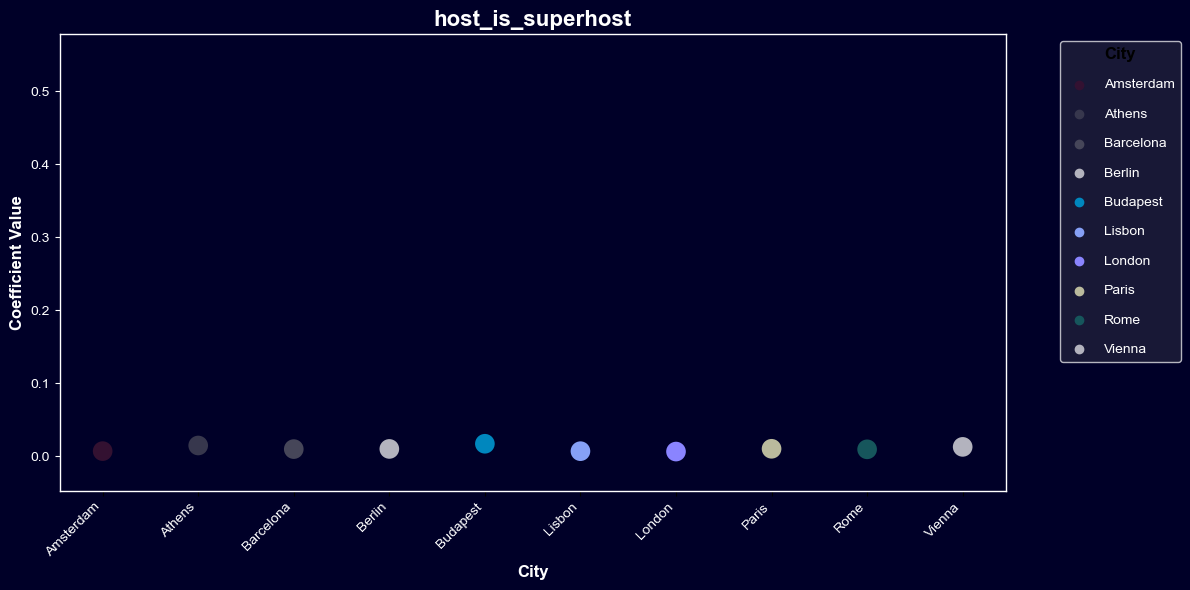

/var/folders/jc/0hd8z2gn2xn0l9ks8yxp3jxw0000gn/T/ipykernel_7499/1128362333.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coef_df['city'] = coef_df['city'].apply(lambda x: str(x))  # Ensure cities are strings


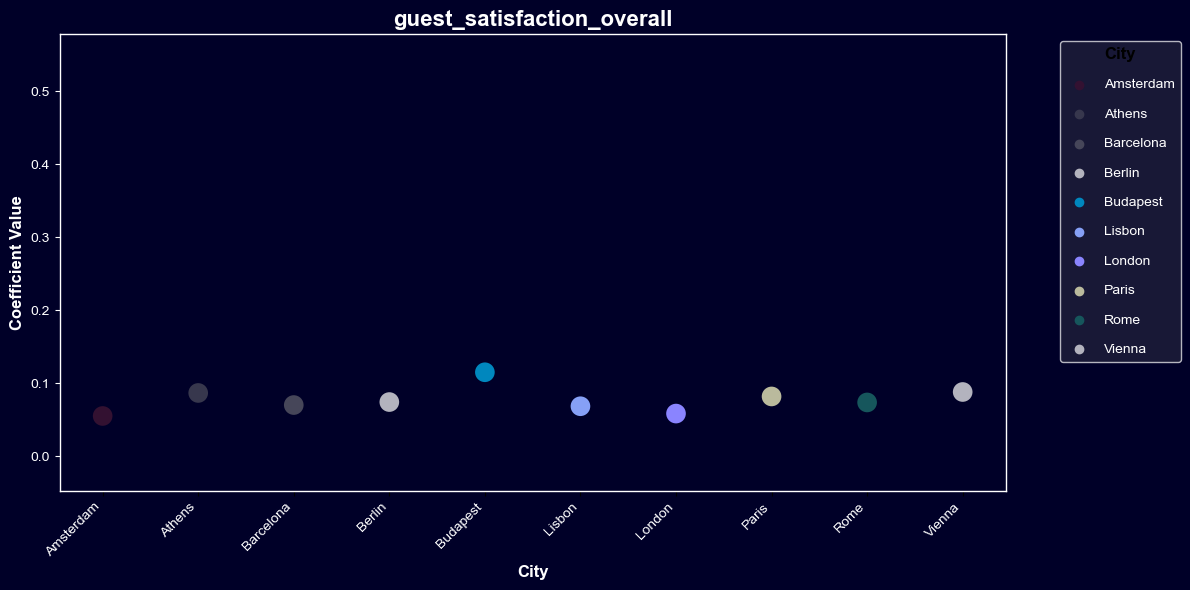

/var/folders/jc/0hd8z2gn2xn0l9ks8yxp3jxw0000gn/T/ipykernel_7499/1128362333.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coef_df['city'] = coef_df['city'].apply(lambda x: str(x))  # Ensure cities are strings


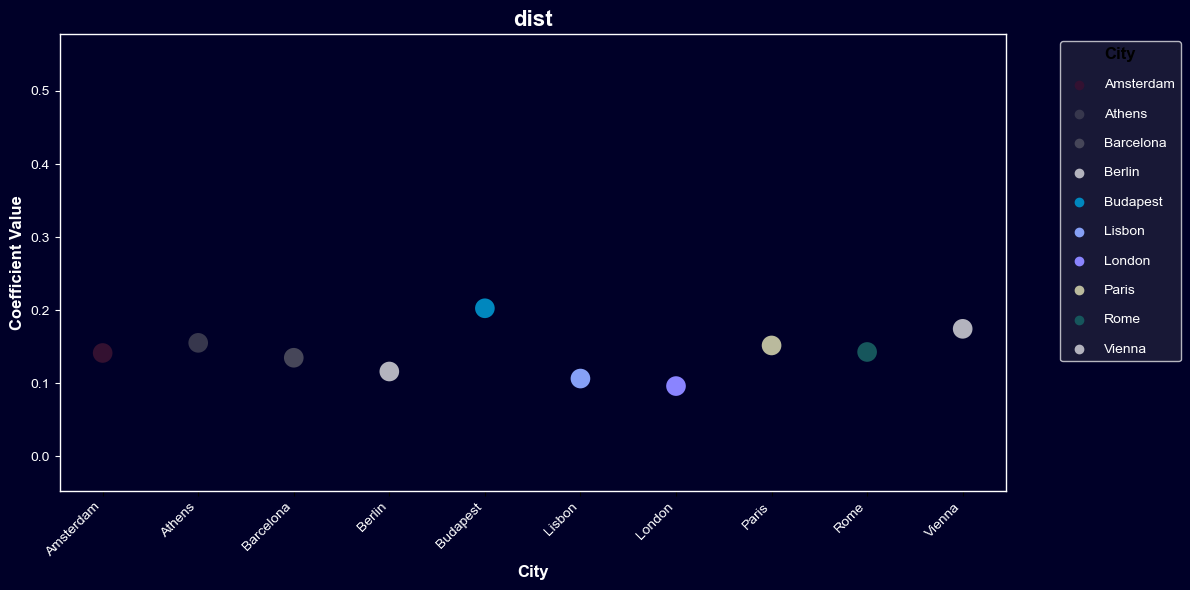

/var/folders/jc/0hd8z2gn2xn0l9ks8yxp3jxw0000gn/T/ipykernel_7499/1128362333.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coef_df['city'] = coef_df['city'].apply(lambda x: str(x))  # Ensure cities are strings


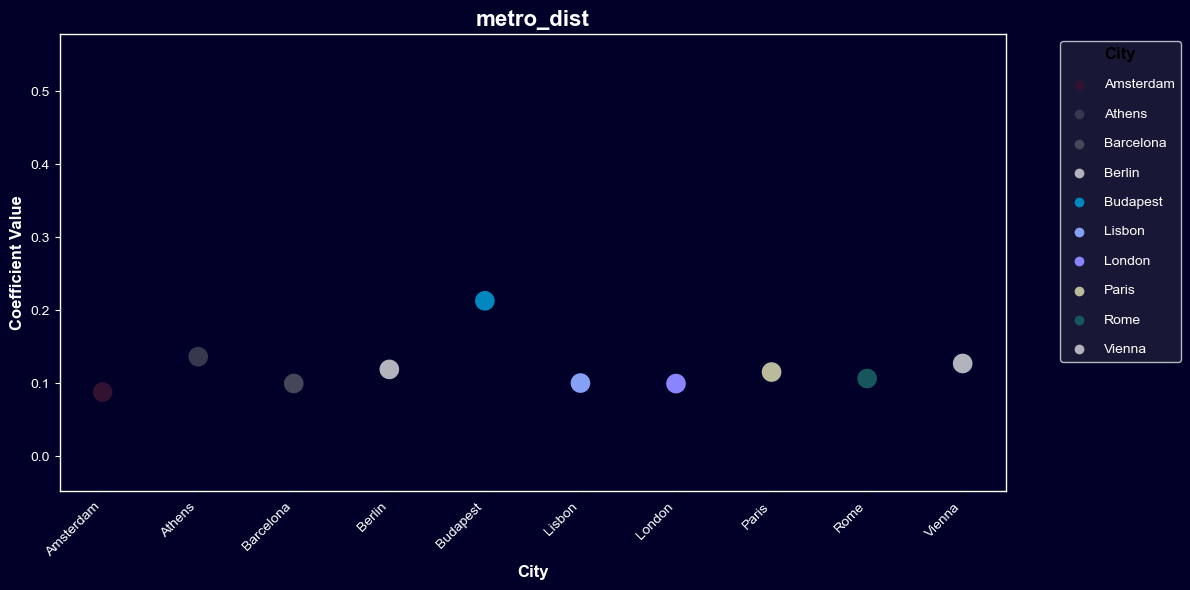

/var/folders/jc/0hd8z2gn2xn0l9ks8yxp3jxw0000gn/T/ipykernel_7499/1128362333.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coef_df['city'] = coef_df['city'].apply(lambda x: str(x))  # Ensure cities are strings


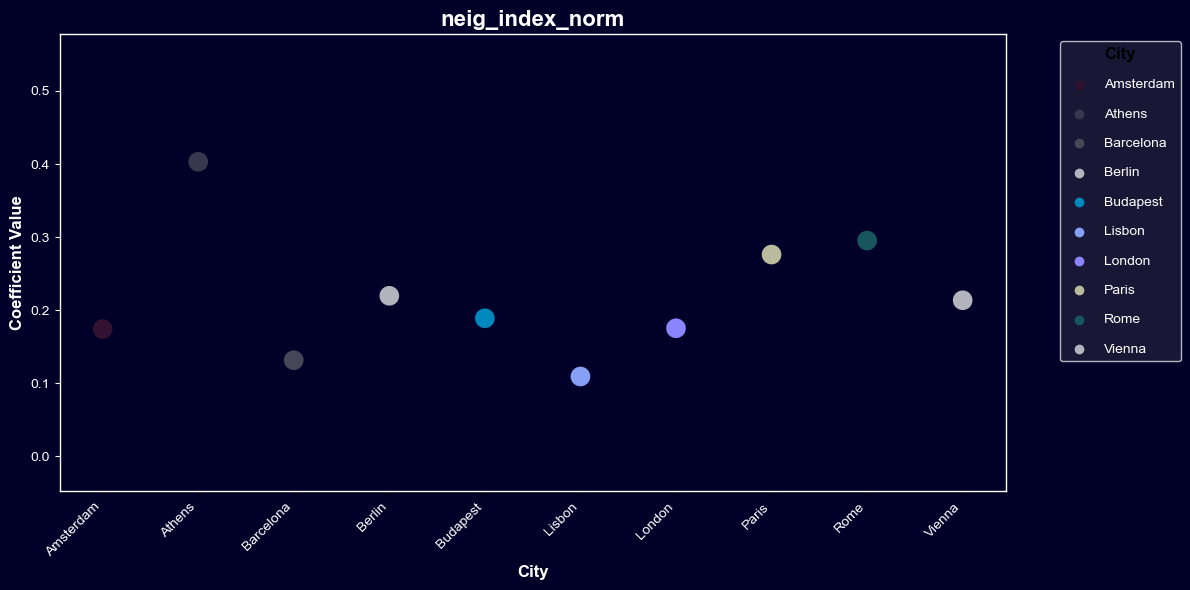

/var/folders/jc/0hd8z2gn2xn0l9ks8yxp3jxw0000gn/T/ipykernel_7499/1128362333.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coef_df['city'] = coef_df['city'].apply(lambda x: str(x))  # Ensure cities are strings


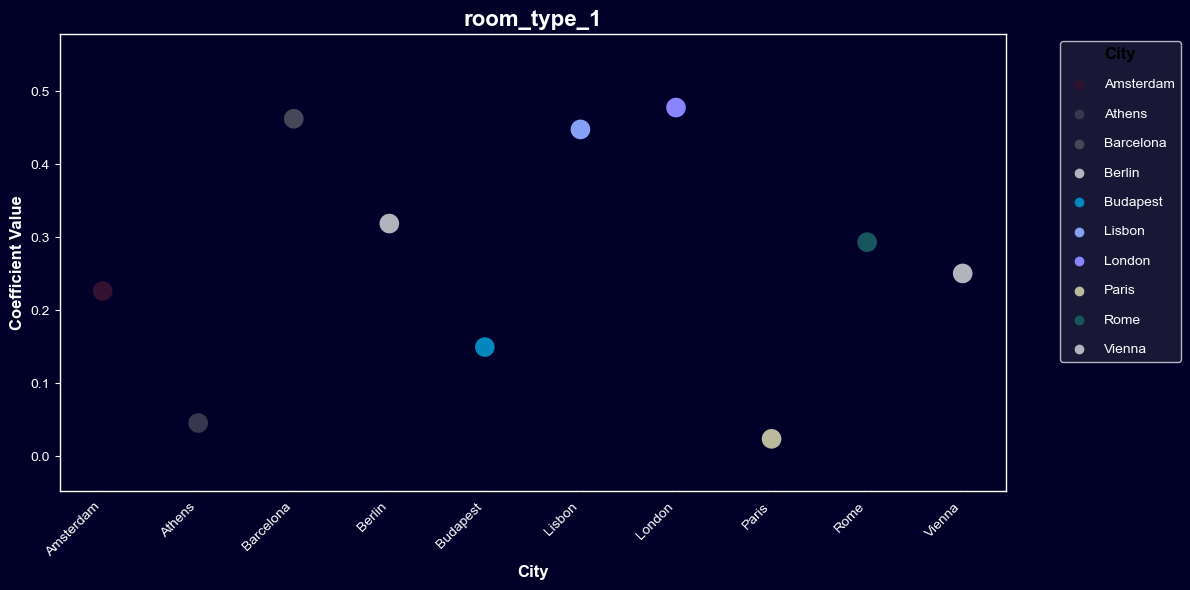

/var/folders/jc/0hd8z2gn2xn0l9ks8yxp3jxw0000gn/T/ipykernel_7499/1128362333.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coef_df['city'] = coef_df['city'].apply(lambda x: str(x))  # Ensure cities are strings


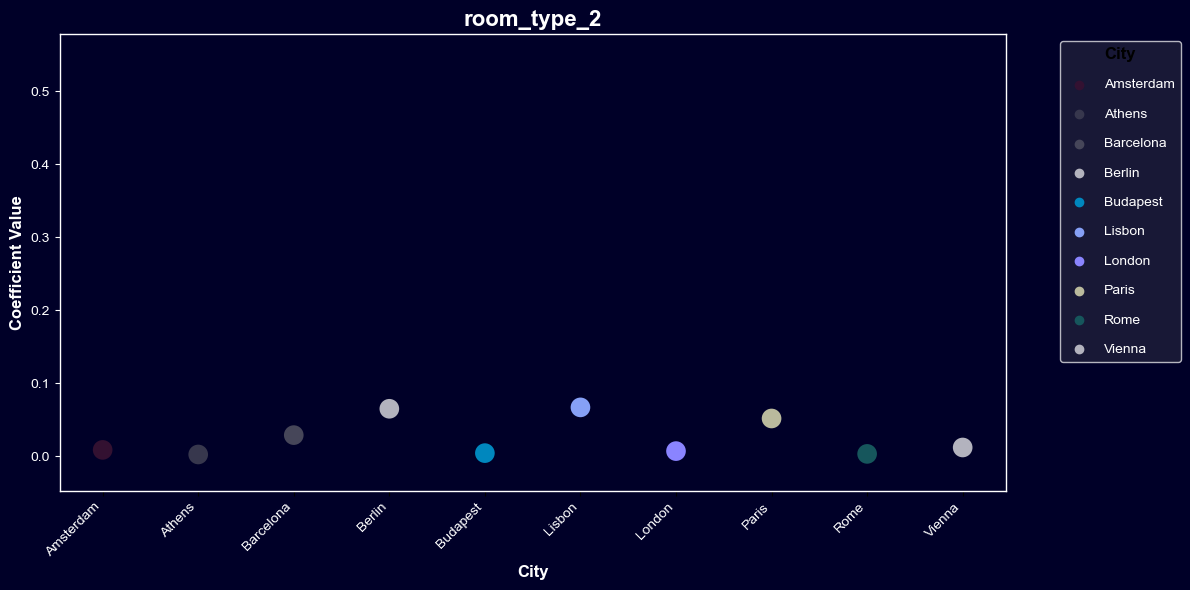

In [209]:


# Define a dictionary mapping numerical values to city names
city_mapping = {
    0: 'Amsterdam',
    1: 'Athens',
    2: 'Barcelona',
    3: 'Berlin',
    4: 'Budapest',
    5: 'Lisbon',
    6: 'London',
    7: 'Paris',
    8: 'Rome',
    9: 'Vienna'
}

# Replace the numerical city values with the corresponding city names
rf_coefficients_df['city'] = rf_coefficients_df['city'].replace(city_mapping)

# List of unique coefficients (names)
coefficients = rf_coefficients_df['coefficient_name'].unique()

# Get the global min and max coefficient values for consistent y-axis limits
min_coef_value = rf_coefficients_df['coefficient_value'].min() - 0.05
max_coef_value = rf_coefficients_df['coefficient_value'].max() + 0.1

# Define city colors (as per your previous specification)
city_colors = {
    'Amsterdam': '#331131',
    'Athens': '#37374d',
    'Barcelona': '#464659',
    'Berlin': '#b3b3be',
    'Budapest': '#0087be',
    'Lisbon': '#86a0f6',
    'London': '#8a84ff',
    'Paris': '#baba9d',
    'Rome': '#16565c',
    'Vienna': '#b3b3be'
}

# Set the default font to Arial
plt.rcParams['font.family'] = 'Arial'

# Create a scatter plot for each coefficient
for coef in coefficients:
    # Filter the dataframe for the current coefficient
    coef_df = rf_coefficients_df[rf_coefficients_df['coefficient_name'] == coef]
    
    # Sort the cities alphabetically
    coef_df['city'] = coef_df['city'].apply(lambda x: str(x))  # Ensure cities are strings
    coef_df = coef_df.sort_values('city')  # Sort cities alphabetically
    
    # Create a new figure for each coefficient
    plt.figure(figsize=(12, 6))
    
    # Create the scatter plot for this coefficient with larger dots
    sns.scatterplot(data=coef_df, x='city', y='coefficient_value', hue='city', palette=city_colors, s=200, edgecolor='none')
    
    # Set the title and labels
    plt.title(f'{coef}', fontsize=16, color='white', fontweight='bold')
    plt.xlabel('City', fontsize=12, color='white', fontweight='bold')
    plt.ylabel('Coefficient Value', fontsize=12, color='white', fontweight='bold')
    
    # Set the same y-axis limits for all graphs
    plt.ylim(min_coef_value, max_coef_value)
    
    # Rotate city names for better visibility
    plt.xticks(rotation=45, ha='right', color='white', fontsize=10)
    
    # Set background color of the plot area
    plt.gca().set_facecolor('#000028')  # Set the background color of the plot area
    plt.gcf().set_facecolor('#000028')  # Set the background color of the figure
    
    # Change the color of the axis lines (spines) to white
    for spine in plt.gca().spines.values():
        spine.set_color('white')
        spine.set_linewidth(1)
    
    # Remove grid lines
    plt.grid(False)
    
    # Set up the font properties for the legend
    font_properties = font_manager.FontProperties(weight='bold', size=12, family='Arial')
    
    # Display the legend with white text and legend title color
    plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left', 
               fontsize=10, facecolor='#23233c', 
               framealpha=0.7, edgecolor='white', labelcolor='white',
               title_fontproperties=font_properties, labelspacing=1.2)
    
    # Ensure y-axis ticks are visible and white
    plt.tick_params(axis='y', colors='white')
    
    # Adjust layout to avoid overlap
    plt.tight_layout()
    
    # Show the plot
    plt.show()
